<a href="https://colab.research.google.com/github/AdnachielBismarck/E-commerce-Sales_Transactions/blob/main/E_commerce_Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración inicial para visualización
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

# Definir paleta de colores personalizada
custom_palette = ['#211a1d', '#6320ee', '#8075ff', '#f8f0fb', '#cad5ca', '#28afb0', '#72e1d1', '#d9dbf1']
custom_palette_1 = ['#ffae03', '#e67f0d', '#fe4e00', '#e9190f', '#ff0f80', '#a4036f', '#3e2f5b', '#3b1c32']
custom_palette_2=['#ffb2e6','#d972ff','#8447ff','#8cffda','#ffffe8','#99edcc','#8cffda','#23c9ff']
sns.set_palette(custom_palette)
sns.set_palette(custom_palette_1)
sns.set_palette(custom_palette_2)

In [3]:
# Carga y Obtención del dataset de trabajo
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analysis_Projects/E-commerce_Sales_Transactions/ecommerce_sales_34500.csv'

# Cargar archivo como CSV
try:
  data=pd.read_csv(file_path)
  print("Dataset cargado exitosamente.")
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta especificada.{file_path}")

Mounted at /content/drive
Dataset cargado exitosamente.


##### **EDA**

In [4]:
print("\nPrimeras filas del dataset:")
print(data.head(3))

print("\nÚltimas filas del dataset:")
print(data.tail(3))

print("Información general del dataset:")
print(data.info())

print("\nValores faltantes por columna:")
print(data.isnull().sum())

print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())

print("\nDimensiones del dataset (filas, columnas):")
print(data.shape)

print("\nPeriodo comprendido en el dataset:")
print(data['order_date'].min(),data['order_date'].max())

print("\nInformación estadística del dataset:")
print(data.describe())

print("\nTabla de correlaciones")
print(data.corr(numeric_only=True))


Primeras filas del dataset:
  order_id customer_id product_id     category   price  discount  quantity  \
0  O100000      C17270    P234890         Home  164.08      0.15         1   
1  O100001      C17603    P228204      Grocery   24.73      0.00         1   
2  O100002      C10860    P213892  Electronics  175.58      0.05         1   

  payment_method  order_date  delivery_time_days region returned  \
0    Credit Card  2023-12-23                   4   West       No   
1    Credit Card  2025-04-03                   6  South       No   
2    Credit Card  2024-10-08                   4  North       No   

   total_amount  shipping_cost  profit_margin  customer_age customer_gender  
0        139.47           7.88          31.17            60          Female  
1         24.73           4.60          -2.62            37            Male  
2        166.80           6.58          13.44            34            Male  

Últimas filas del dataset:
      order_id customer_id product_id     cat

##### **Información general de ventas**


Total de ventas:
5865293.01

Total de devoluciones:
388755.97

Total de ordenes realizadas
34500

Total de devoluciones realizadas:
1903

Venta promedio de compra:
170.01

Número de clientes:
7903

Ventas por mes:
month
2023-09    151135.60
2023-10    262502.74
2023-11    240286.91
2023-12    255617.03
2024-01    217766.09
2024-02    228013.98
2024-03    248176.28
2024-04    265596.66
2024-05    264875.23
2024-06    234155.38
2024-07    253369.40
2024-08    212613.20
2024-09    218873.90
2024-10    258931.27
2024-11    250572.04
2024-12    278154.19
2025-01    224390.21
2025-02    215338.19
2025-03    239346.81
2025-04    263024.03
2025-05    248527.46
2025-06    248776.28
2025-07    249593.50
2025-08    243808.50
2025-09     91848.17
Name: total_amount, dtype: float64


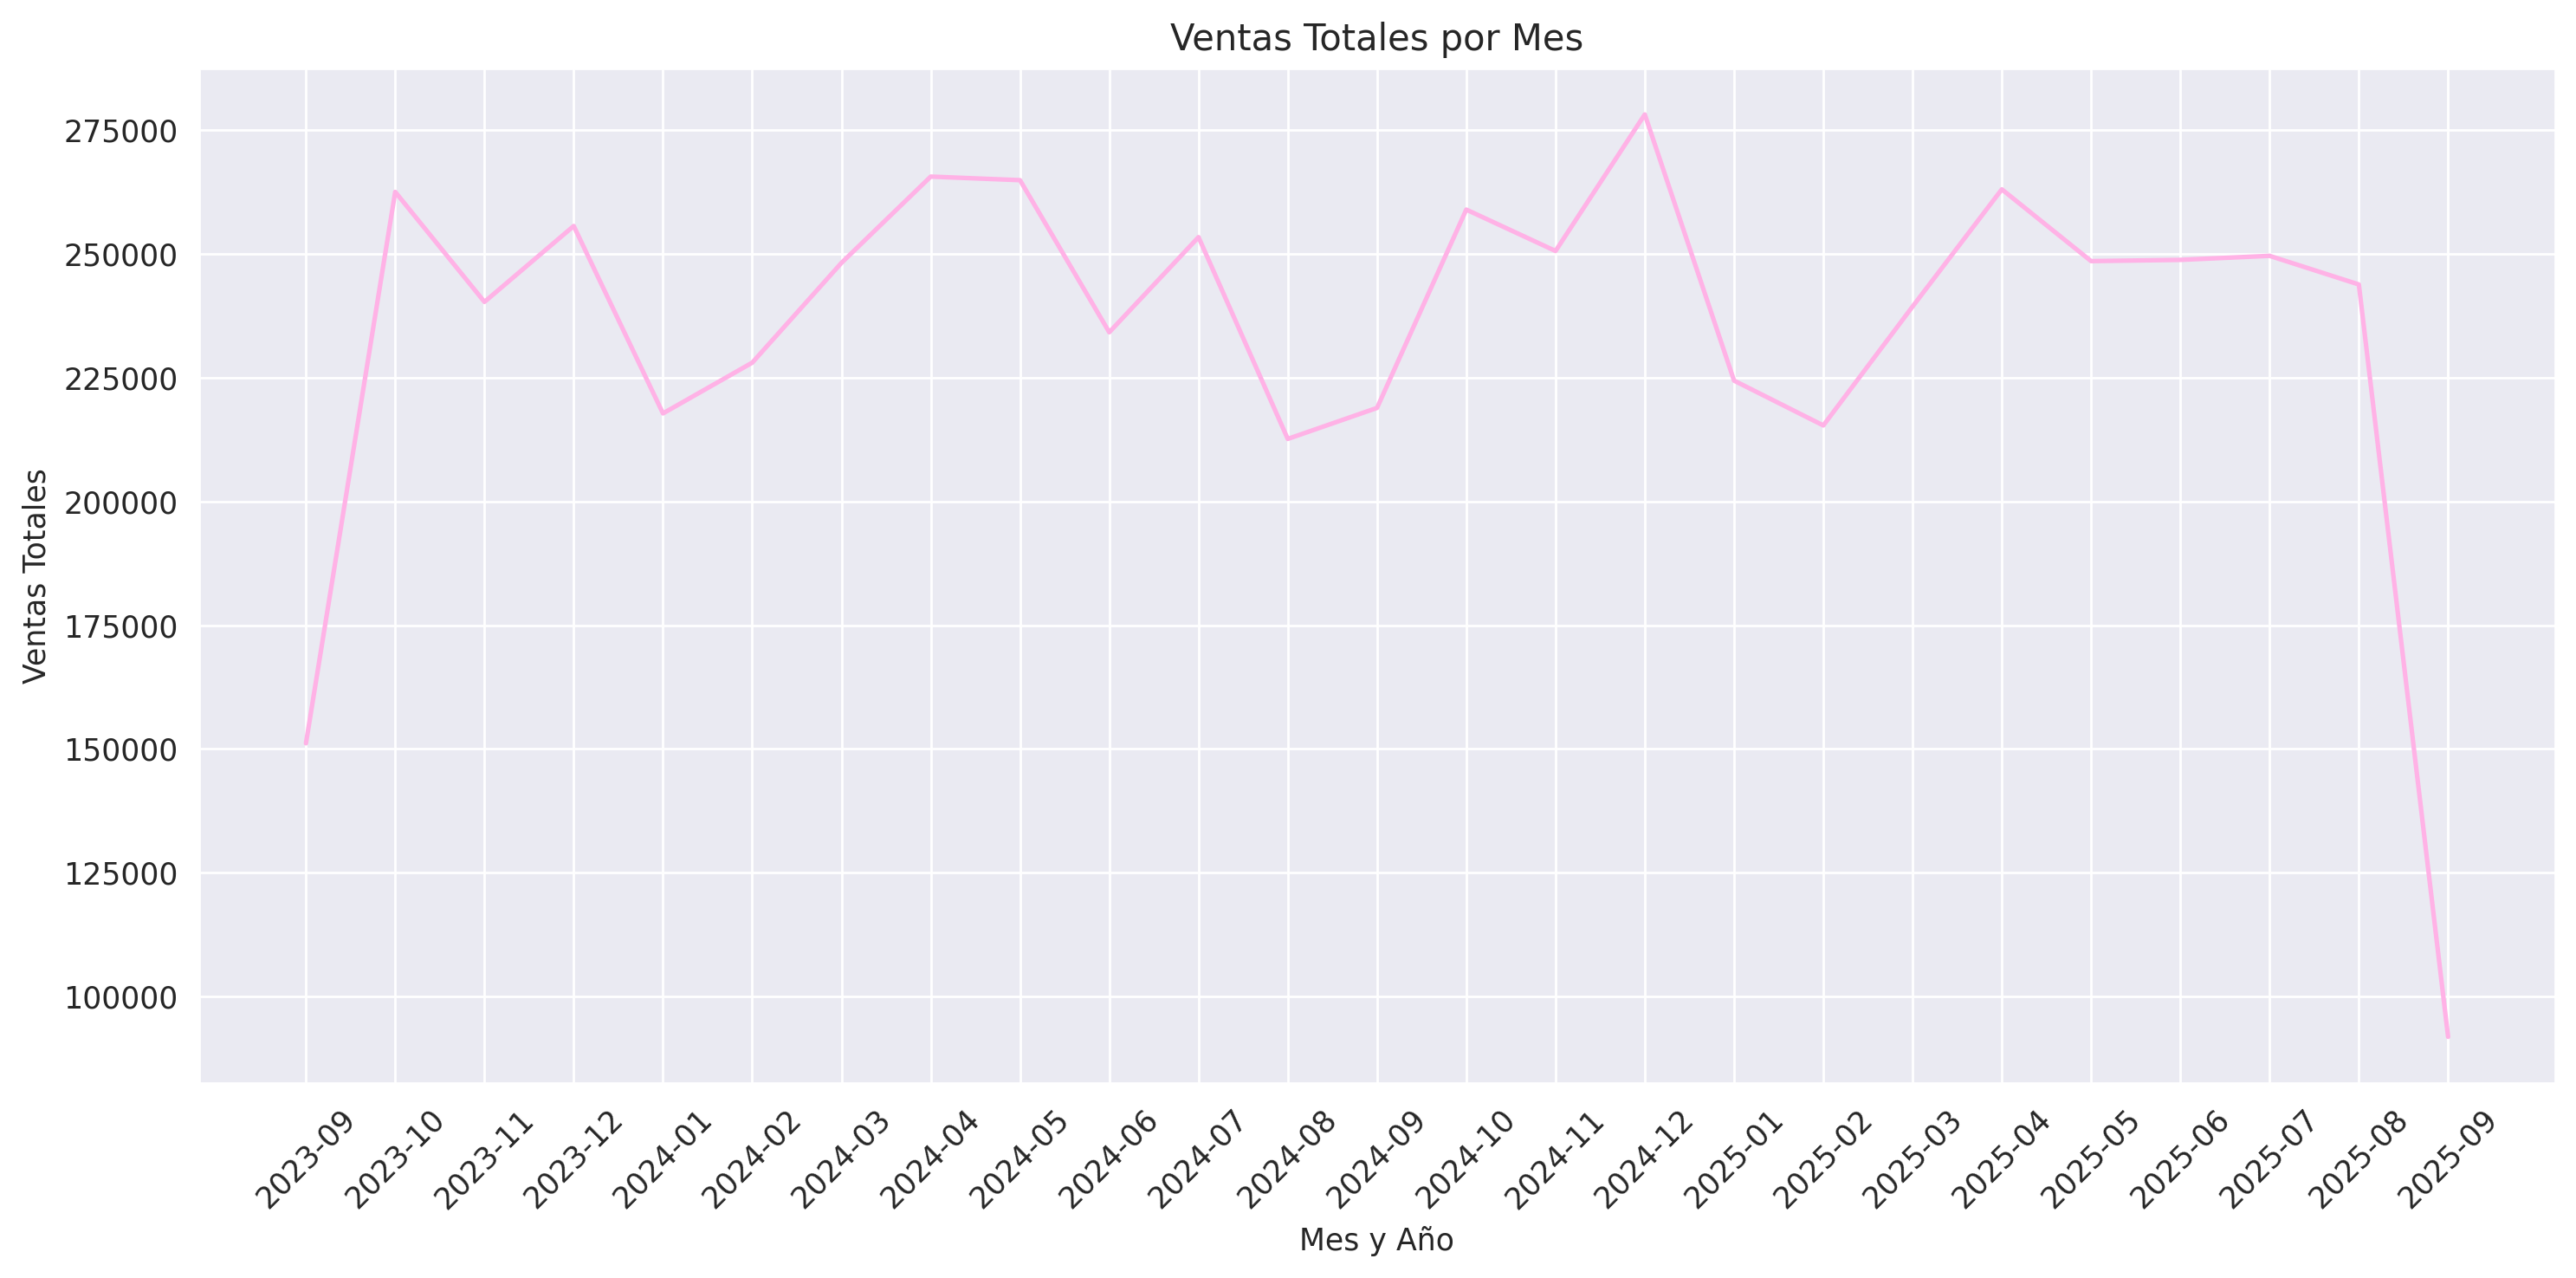

In [6]:
# Ventas totales
print("\nTotal de ventas:")
Ventas_total=(data['price']*data['quantity']*(1-data['discount'])).sum()
print(f"{Ventas_total:.2f}")

# Devoluciones
print("\nTotal de devoluciones:")
Devoluciones_total=(data[data['returned']=='Yes']['total_amount']).sum()
print(f"{Devoluciones_total:.2f}")

# Total de ordenes realizadas
print("\nTotal de ordenes realizadas")
Total_ordenes_realizadas=(data['order_id']).nunique()
print(Total_ordenes_realizadas)

# Total de devoluciones realizadas
print("\nTotal de devoluciones realizadas:")
Total_devoluciones_realizadas=(data[data['returned']=='Yes']['order_id']).nunique()
print(Total_devoluciones_realizadas)

# Venta promedio
print("\nVenta promedio de compra:")
Venta_promedio=(data['total_amount']).mean()
print(f"{Venta_promedio:.2f}")

# Número de clientes
print("\nNúmero de clientes:")
Numero_clientes=(data['customer_id']).nunique()
print(Numero_clientes)

# Datos organizados por mes
print("\nVentas por mes:")
data['order_date']=pd.to_datetime(data['order_date'])
data['month']=data['order_date'].dt.to_period('M')
Ventas_totales_mes=data.groupby('month')['total_amount'].sum()
Ventas_totales_mes.index=Ventas_totales_mes.index.astype(str)
print(Ventas_totales_mes)

#Gráfica de ventas
plt.figure(figsize=(12, 6))
plt.plot(Ventas_totales_mes.index, Ventas_totales_mes.values)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Promedio de días de entrega para pedidos devueltos y no devueltos:
returned
No     4.812836
Yes    4.837625
Name: delivery_time_days, dtype: float64


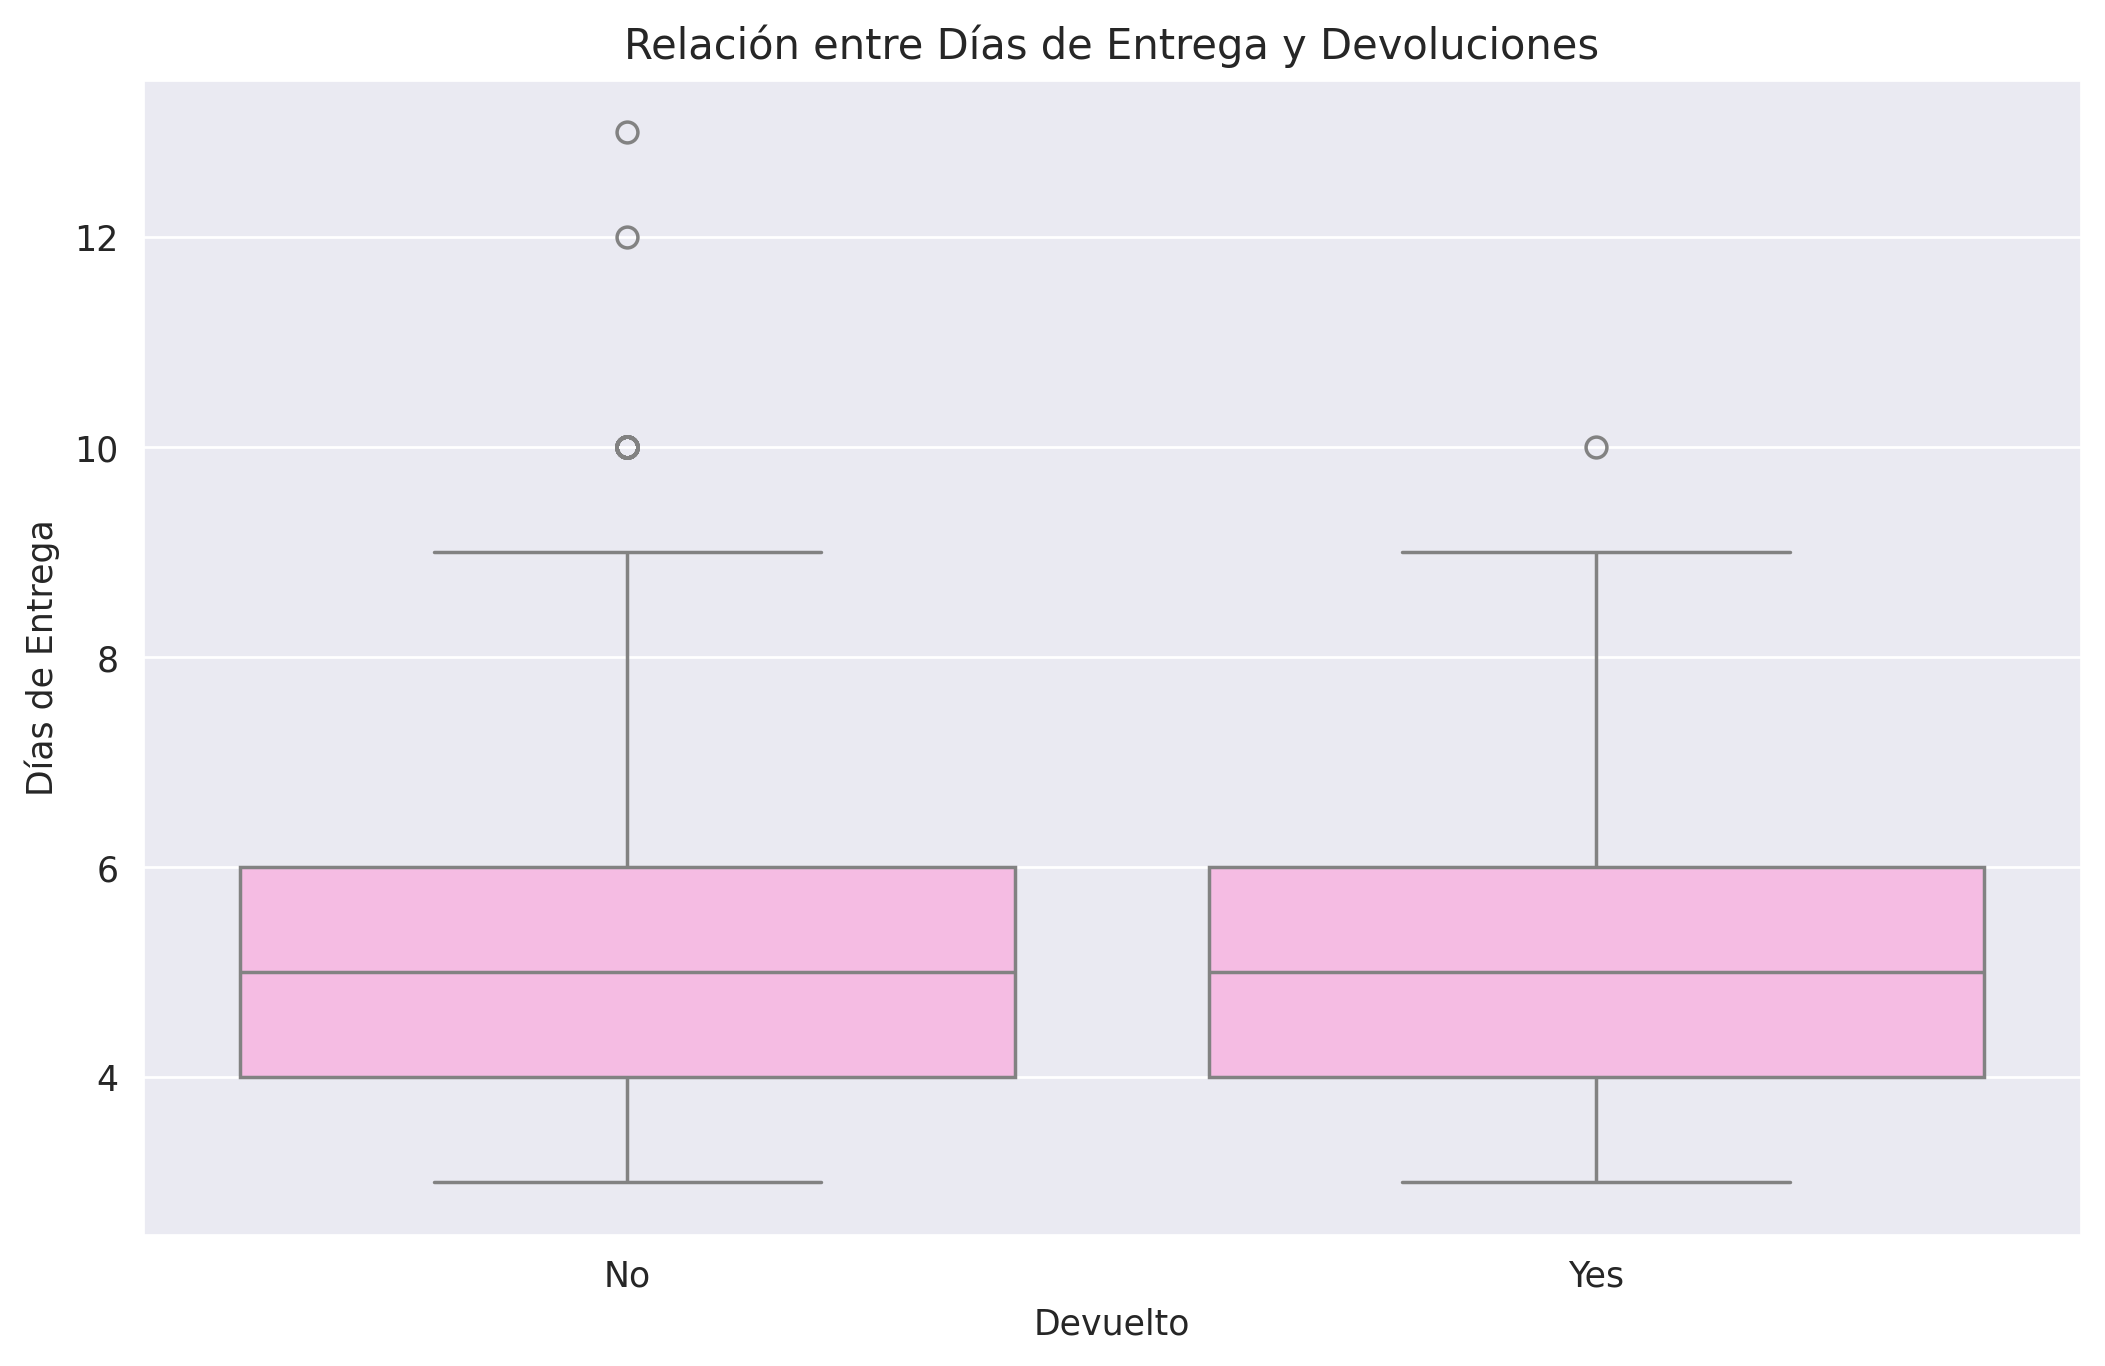

In [5]:
# Calculate the average delivery time for returned and non-returned orders
delivery_time_returns = data.groupby('returned')['delivery_time_days'].mean()
print("Promedio de días de entrega para pedidos devueltos y no devueltos:")
print(delivery_time_returns)

# Visualize the relationship between delivery time and returns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='returned', y='delivery_time_days')
plt.title('Relación entre Días de Entrega y Devoluciones')
plt.xlabel('Devuelto')
plt.ylabel('Días de Entrega')
plt.show()

##### **Descripción de los productos vendidos por categoría**

In [ ]:
print("\nDistribución por categoría de productos:")
print(data['category'].value_counts())

print("\nDistribución de productos:")
print(data['product_id'].value_counts())

print("\nDistribución por región de compra:")
print(data['region'].value_counts())

print("\nDistribución de métodos de pago:")
print(data['payment_method'].value_counts())

print("\nDistribución de devoluciones")
print(data['returned'].value_counts())

print("\nDistribución de la cantidad de días de entrega promedio:")
print(data['delivery_time_days'].value_counts())


Distribución por categoría de productos:
category
Fashion        6254
Electronics    6180
Home           5487
Toys           4247
Sports         4171
Beauty         4103
Grocery        4058
Name: count, dtype: int64

Distribución de productos:
product_id
P200645    7
P235301    6
P237997    6
P224107    6
P218083    6
          ..
P202390    1
P211818    1
P226605    1
P218787    1
P206167    1
Name: count, Length: 24912, dtype: int64

Distribución por región de compra:
region
South      7584
North      7572
East       6904
West       6808
Central    5632
Name: count, dtype: int64

Distribución de métodos de pago:
payment_method
Credit Card    12170
Debit Card      8505
COD             4160
UPI             4156
PayPal          3444
Wallet          2065
Name: count, dtype: int64

Distribución de devoluciones
returned
No     32597
Yes     1903
Name: count, dtype: int64

Distribución de la cantidad de días de entrega promedio:
delivery_time_days
5     10296
4     10094
6      5961
3     

##### **Descripción de los consumidores**



In [15]:
### Agrupación por consumidores

print("\nDistribución por género de compradores:")
Resumen_consumidores=data.groupby('customer_gender').agg(
    numero_clientes=('customer_id',lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_totales=('total_amount','sum'),
    ventas_devolutas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum())
).round(2)
display(Resumen_consumidores.to_markdown())

# Gasto por género y edad

data['age_group']=pd.cut(data['customer_age'],bins=[0,18,25,35,50,100],labels=['<18','18-25','25-35','35-50','>50'])
Compra_por_genero_edad=data.groupby(['age_group','customer_gender'])['total_amount'].mean().unstack()
display(Compra_por_genero_edad.to_markdown())


Distribución por género de compradores:


'| customer_gender   |   numero_clientes |   cantidad_productos_vendidos |   cantidad_productos_devueltos |   ventas_totales |   ventas_devolutas |   cantidad_productos_vendidos_netos |     ventas_netas |\n|:------------------|------------------:|------------------------------:|-------------------------------:|-----------------:|-------------------:|------------------------------------:|-----------------:|\n| Female            |              7026 |                         25181 |                           1409 |      2.8533e+06  |           193983   |                               23772 |      2.65931e+06 |\n| Male              |              6981 |                         24260 |                           1328 |      2.79306e+06 |           182473   |                               22932 |      2.61058e+06 |\n| Other             |              1276 |                          1989 |                            105 | 218941           |            12300.6 |                                1

/tmp/ipython-input-924503536.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Compra_por_genero_edad=data.groupby(['age_group','customer_gender'])['total_amount'].mean().unstack()


'| age_group   |   Female |    Male |   Other |\n|:------------|---------:|--------:|--------:|\n| <18         |  198.162 | 163.519 | 305.074 |\n| 18-25       |  178.025 | 182.359 | 124.46  |\n| 25-35       |  168.601 | 174.991 | 172.193 |\n| 35-50       |  168.871 | 167.867 | 169.963 |\n| >50         |  166.283 | 168.129 | 151.889 |'


Distribución por género de compradores:
                 numero_clientes  cantidad_productos_vendidos  \
customer_gender                                                 
Female                      7026                        25181   
Male                        6981                        24260   
Other                       1276                         1989   

                 cantidad_productos_devueltos  ventas_totales  \
customer_gender                                                 
Female                                   1409      2853296.96   
Male                                     1328      2793055.33   
Other                                     105       218940.76   

                 ventas_devolutas  cantidad_productos_vendidos_netos  \
customer_gender                                                        
Female                  193982.77                              23772   
Male                    182472.56                              22932   
Other              

/tmp/ipython-input-178833463.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Compra_por_genero_edad=data.groupby(['age_group','customer_gender'])['total_amount'].mean().unstack()


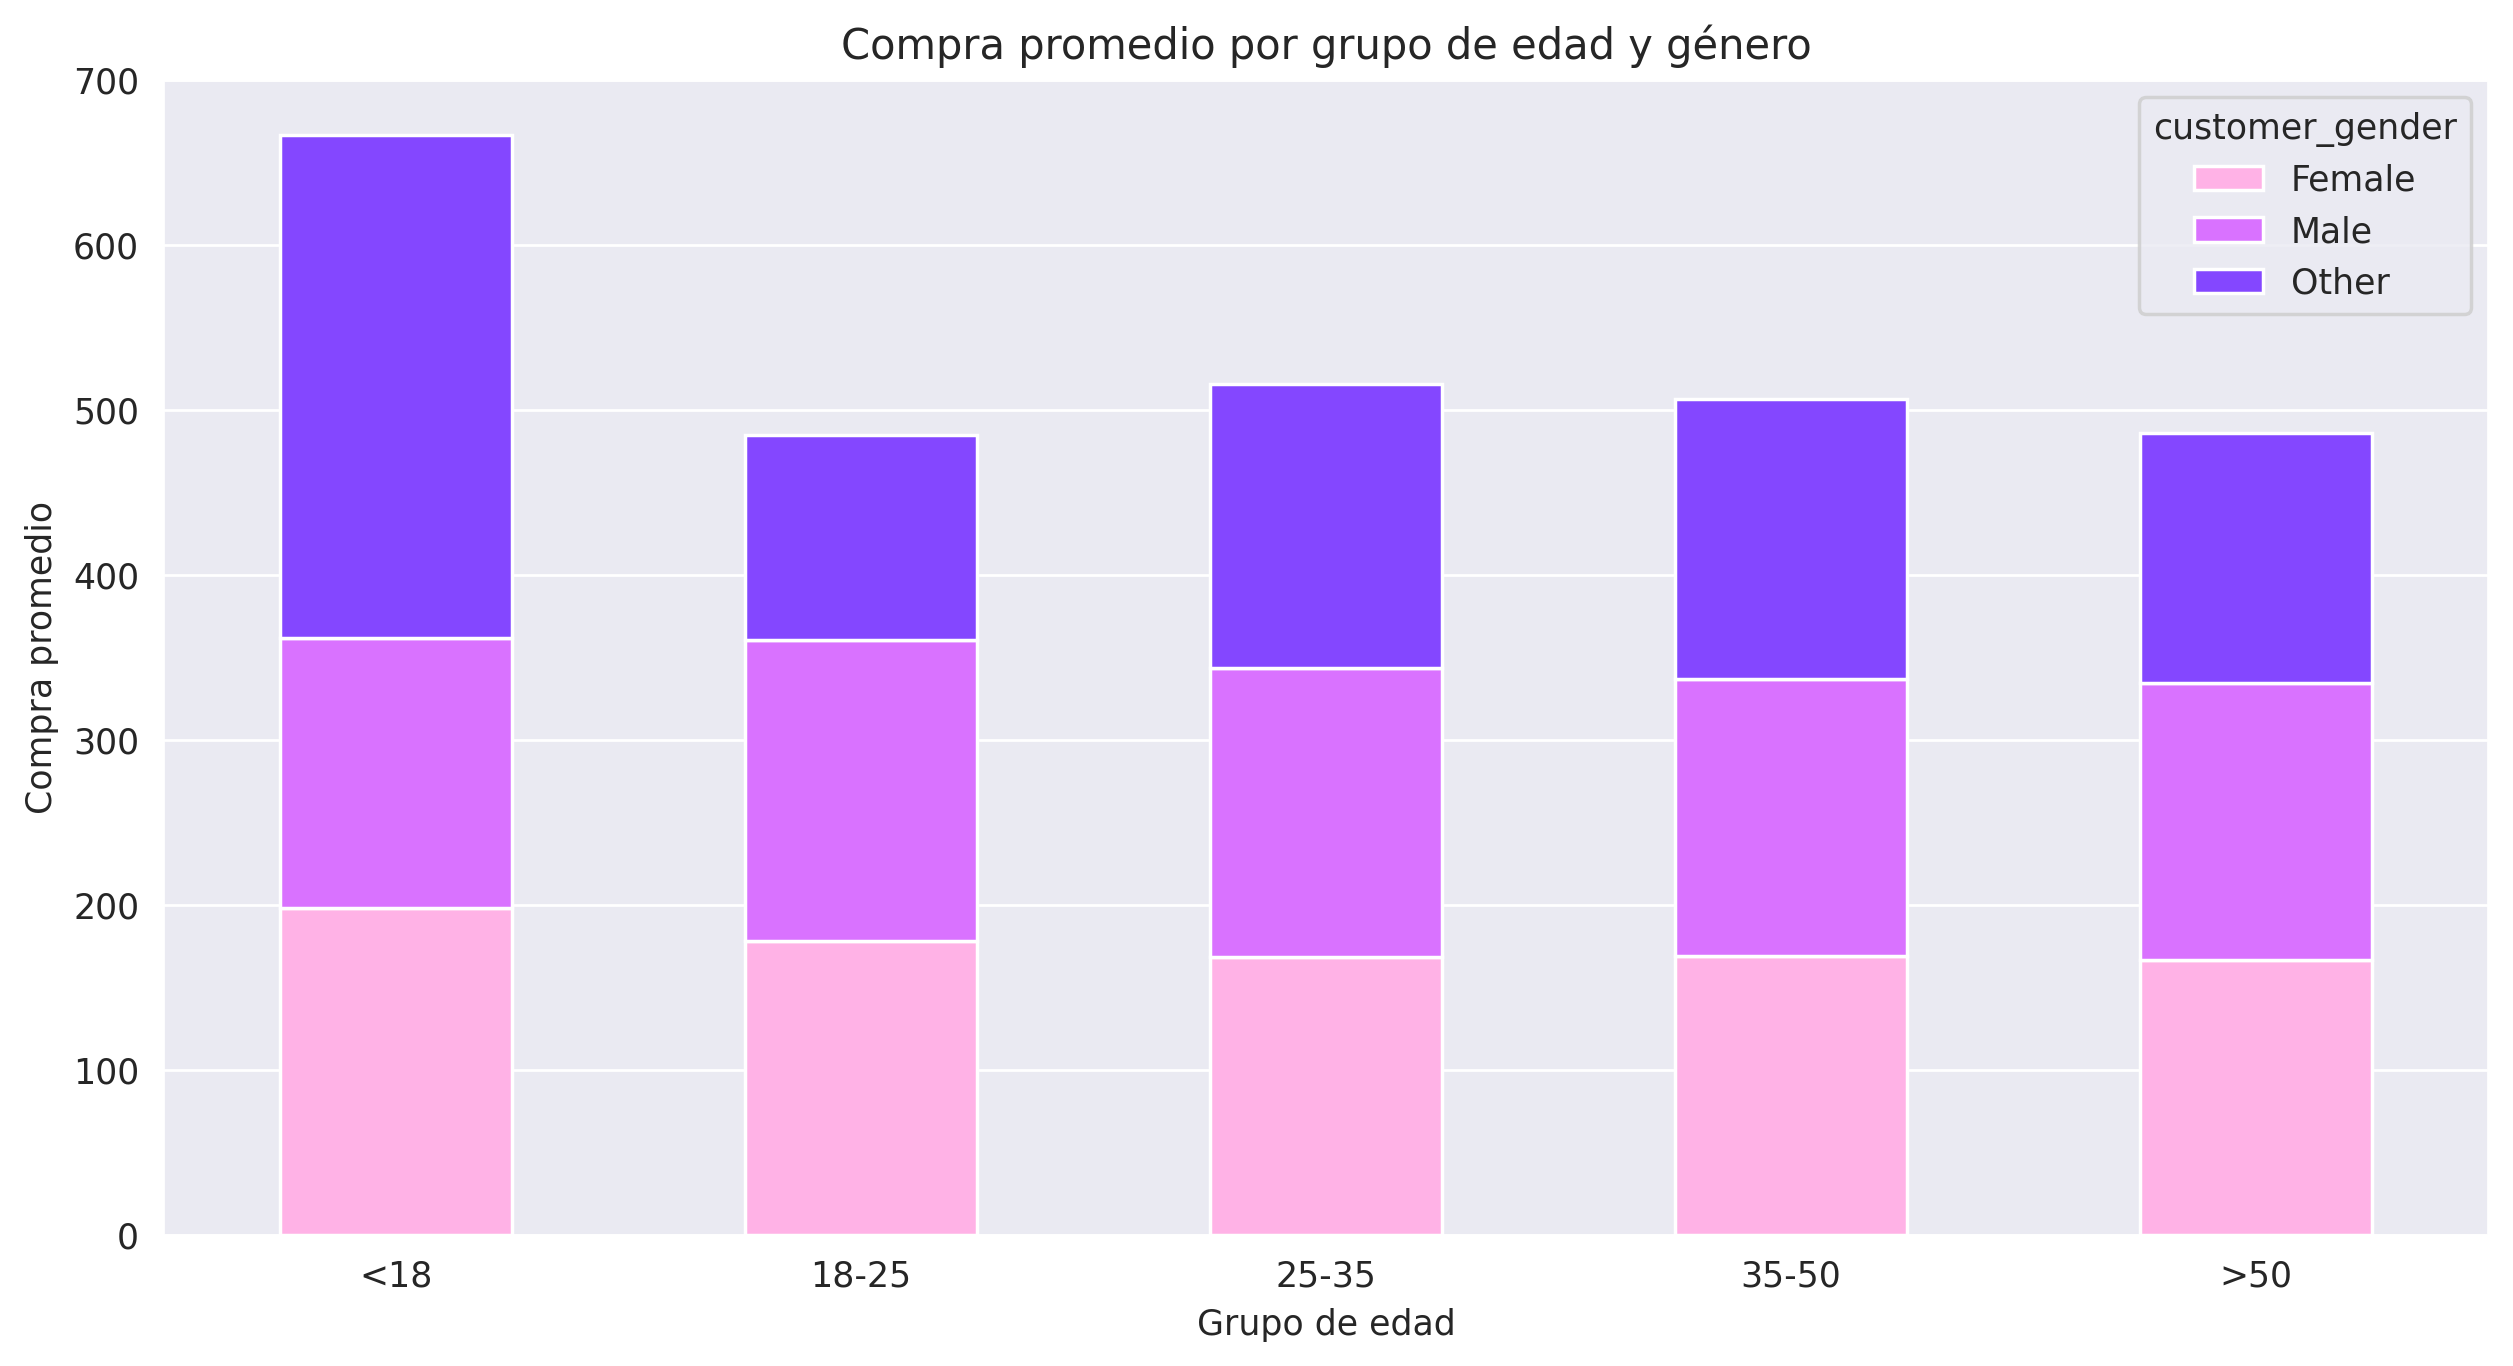

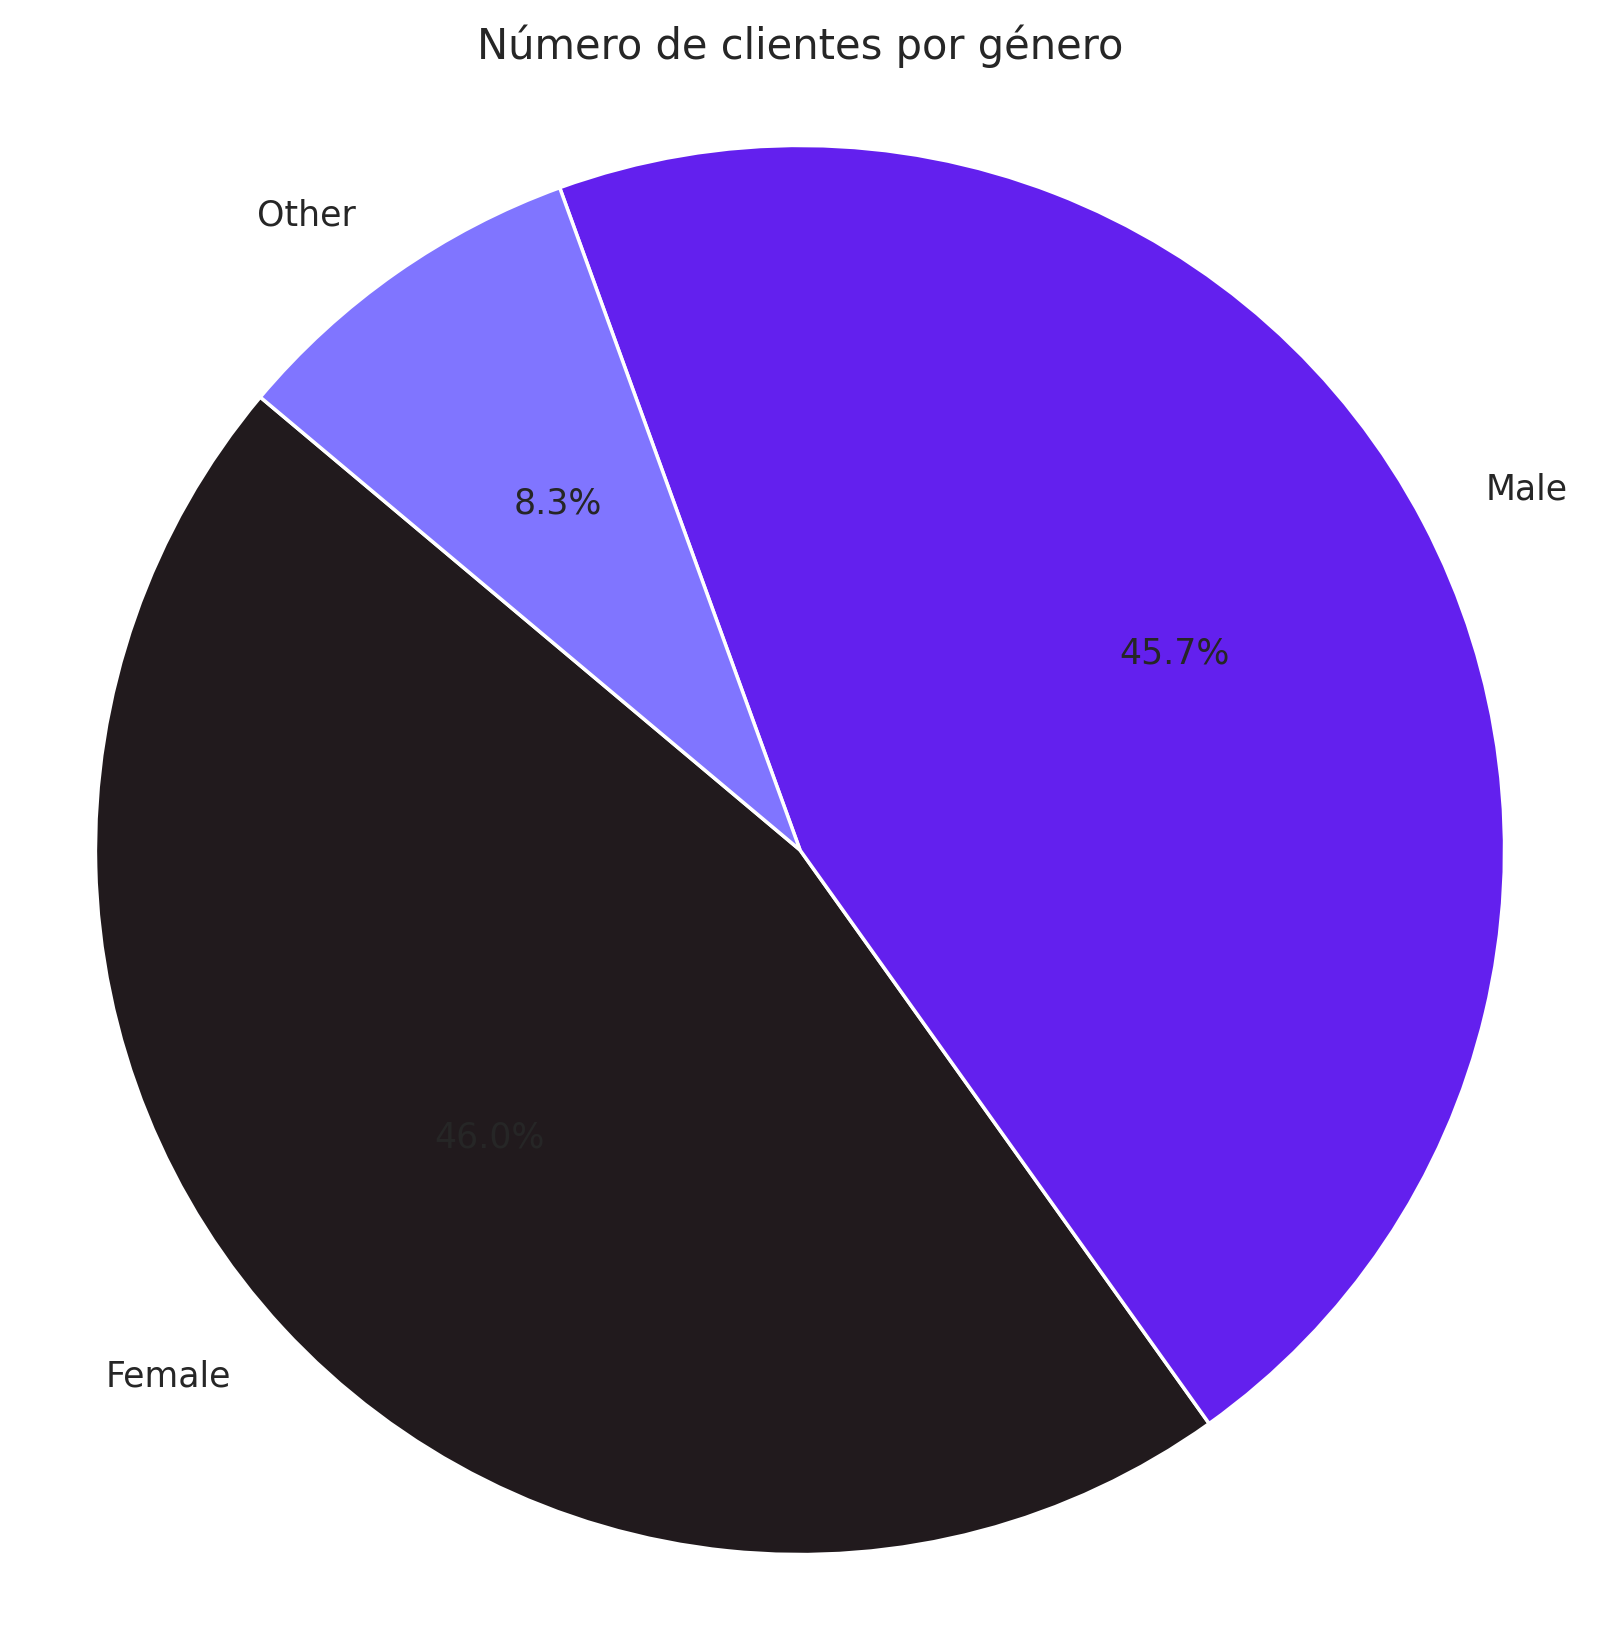

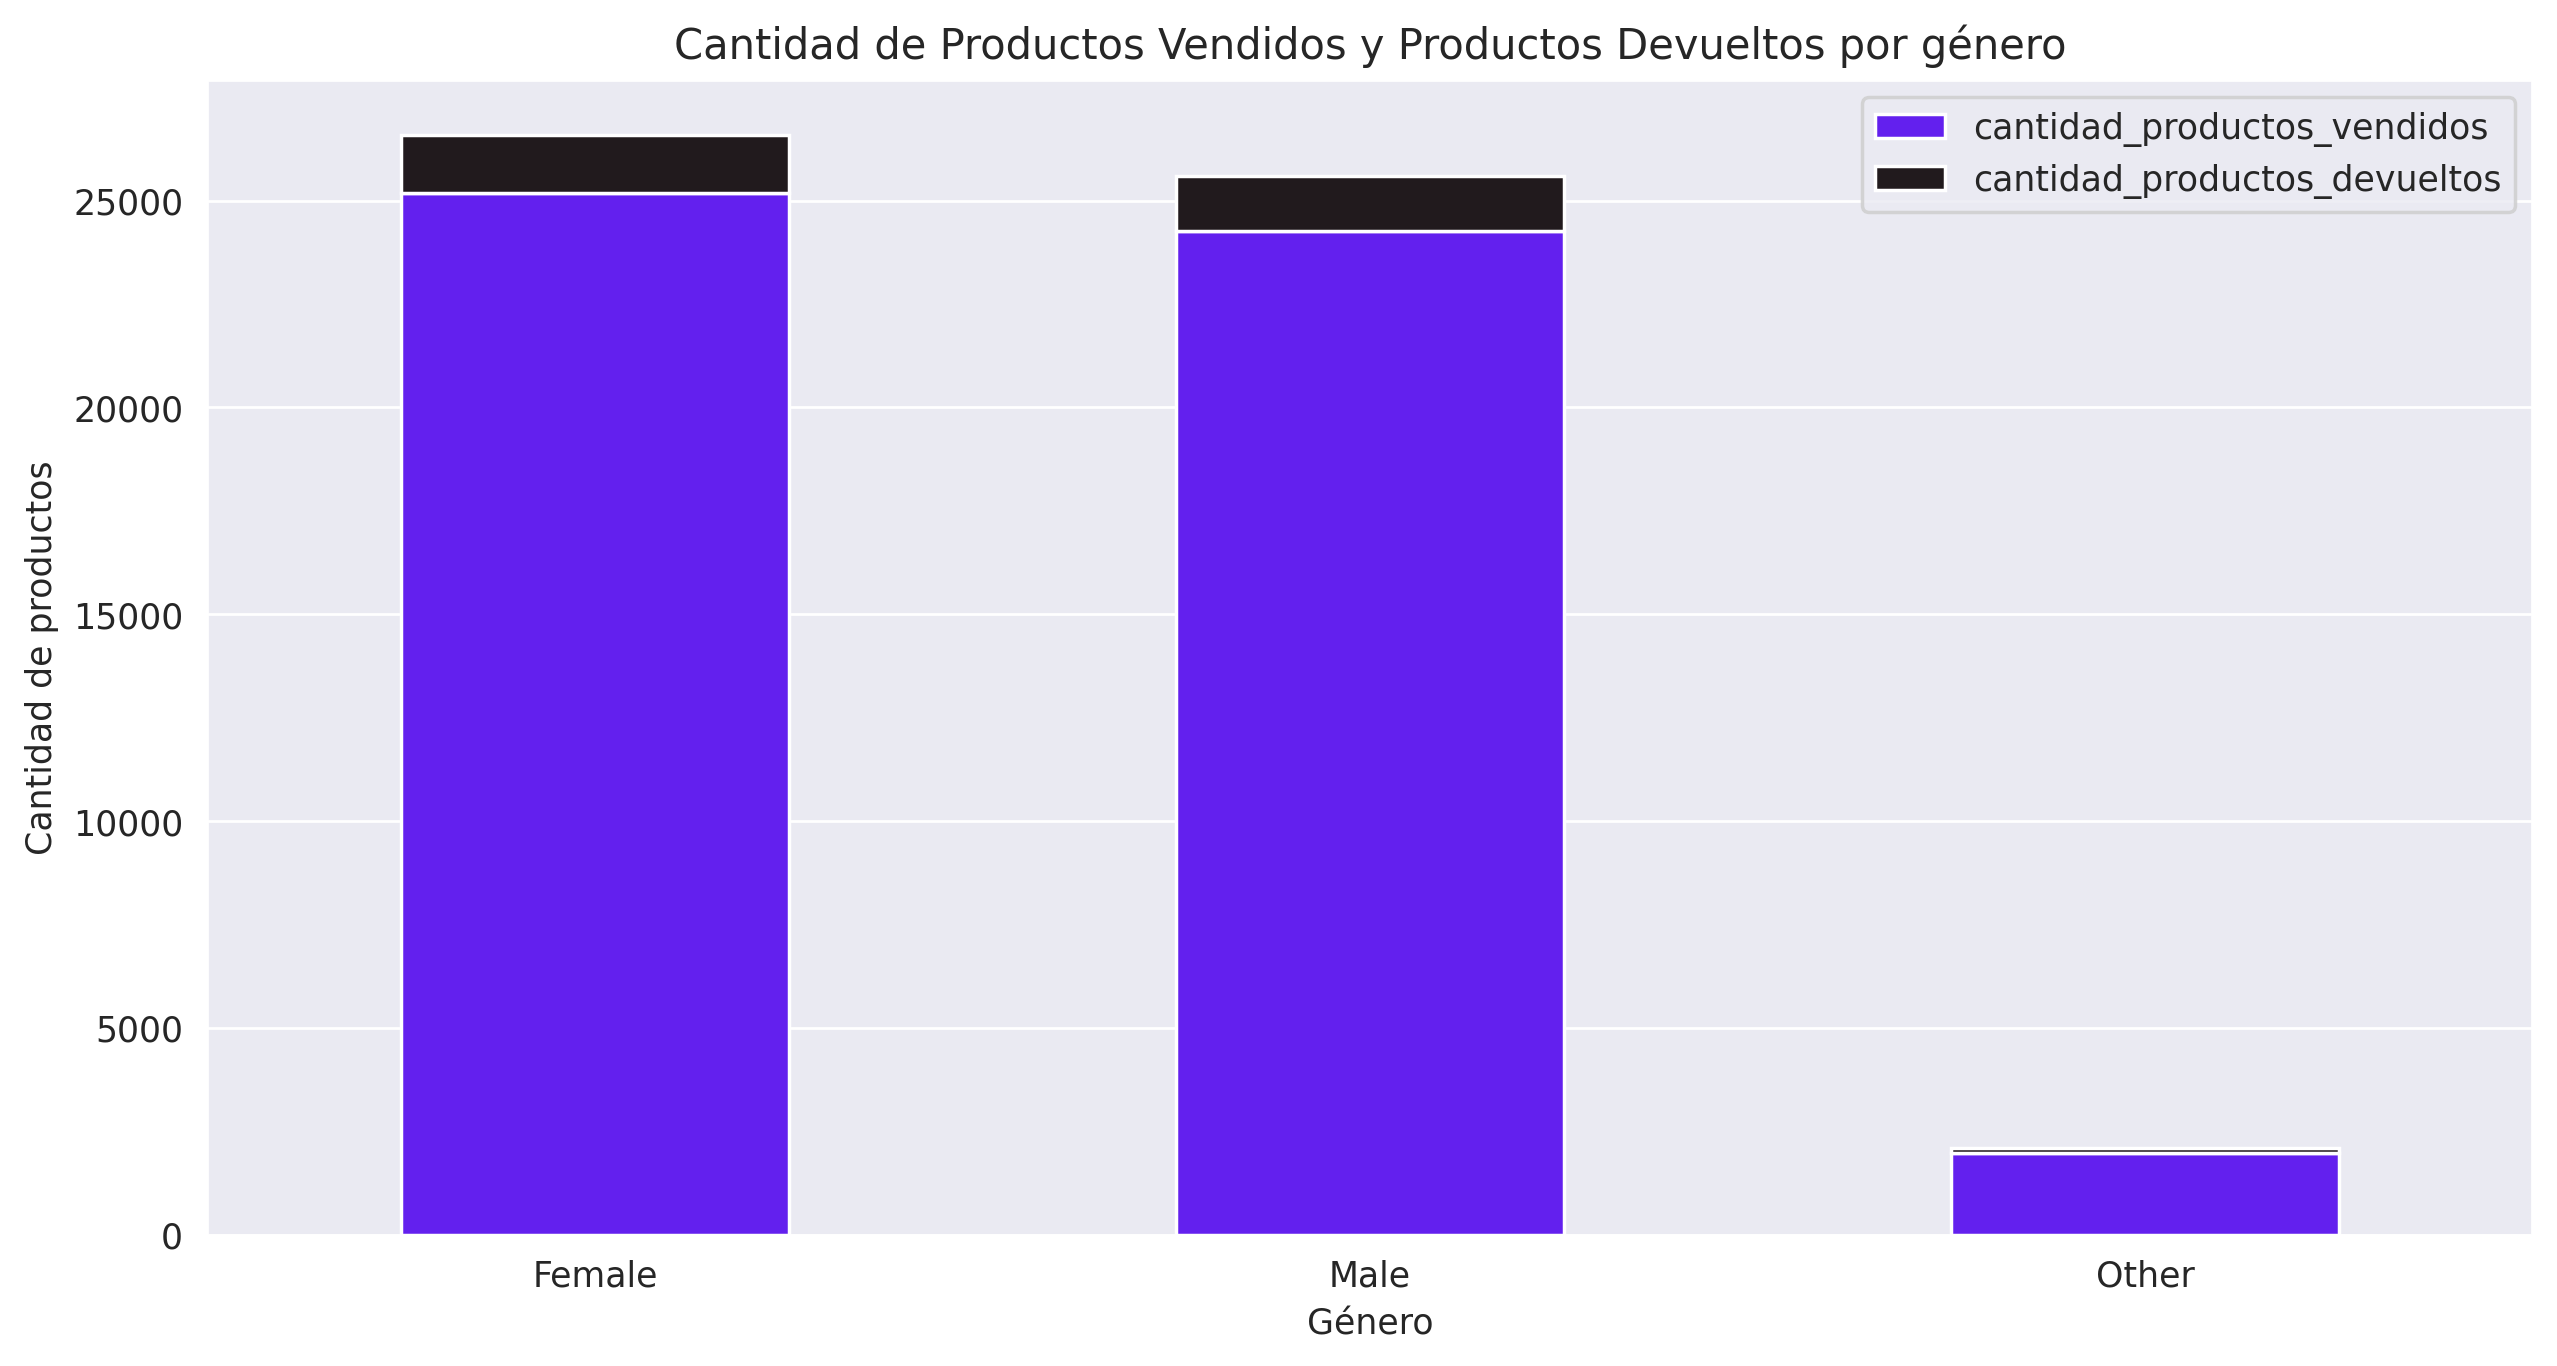

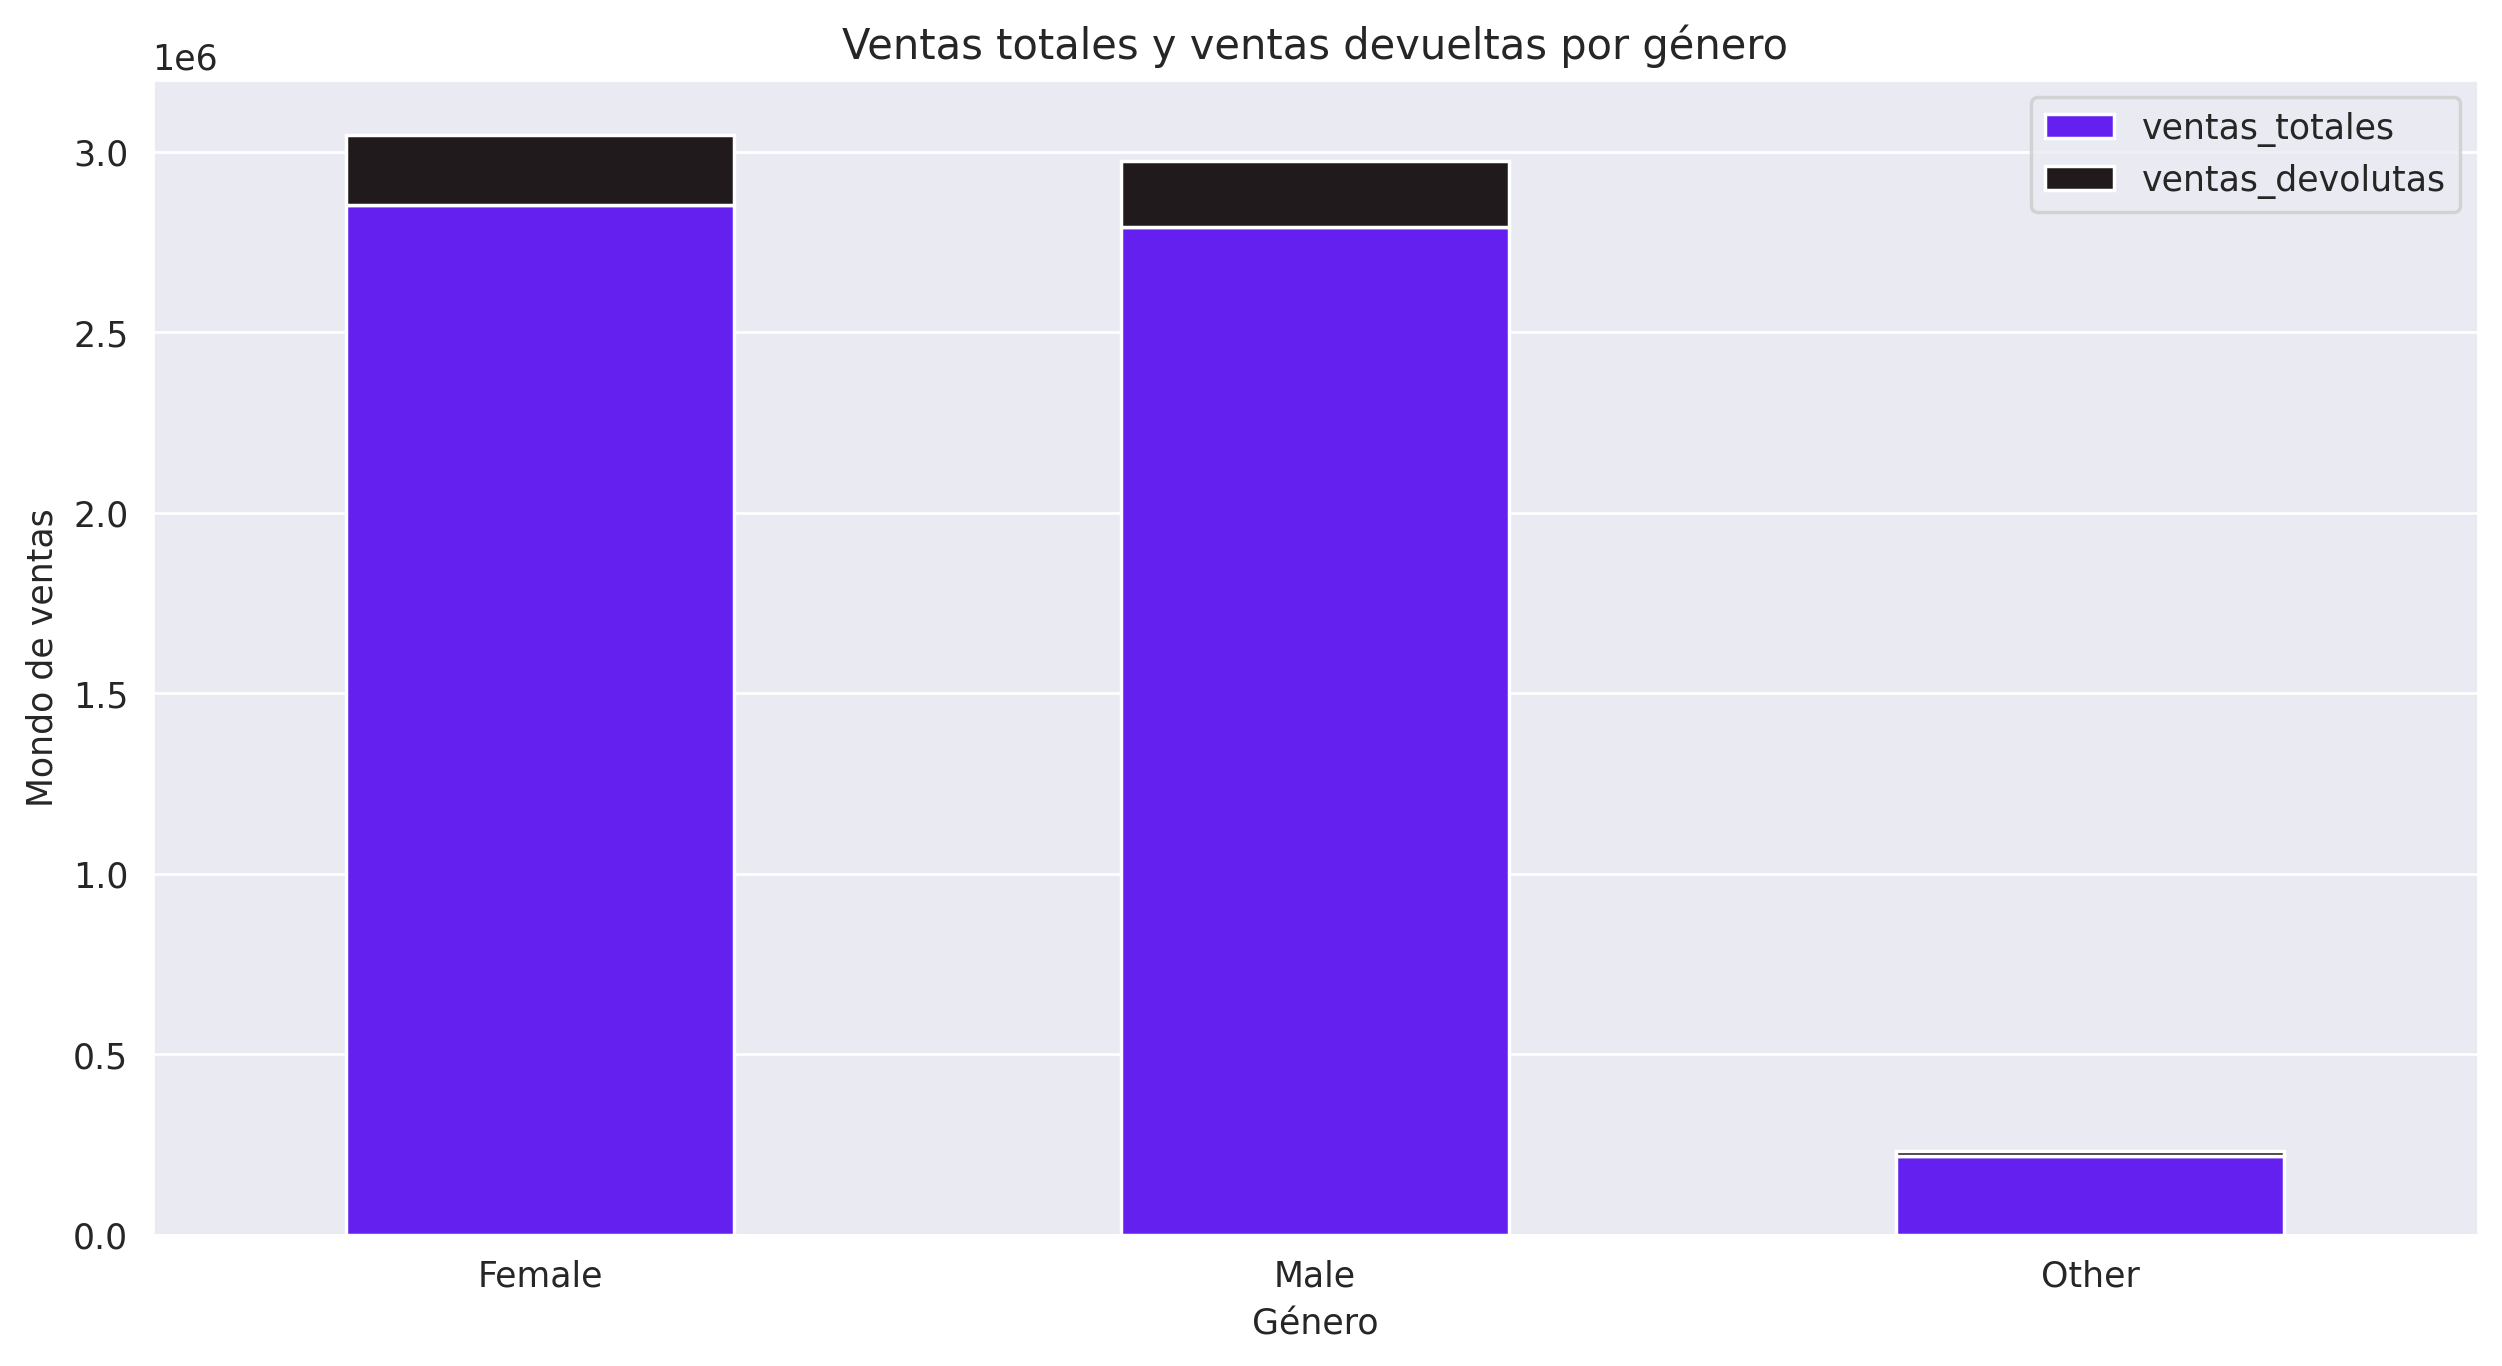

In [ ]:
#Gasto por edad y género

Compra_por_genero_edad.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Compra promedio por grupo de edad y género')
plt.xlabel('Grupo de edad')
plt.ylabel('Compra promedio')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.show()


# Gráfico de cantidad de clientes por género

plt.figure(figsize=(8, 8))
plt.pie(Resumen_consumidores['numero_clientes'], labels=Resumen_consumidores.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(custom_palette, len(Resumen_consumidores)))
plt.title('Número de clientes por género')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Gráfico de cantidad de artículos vendidos y devueltos por género
Resumen_consumidores[['cantidad_productos_vendidos','cantidad_productos_devueltos']].plot(kind='bar',stacked=True,figsize=(12,6),color=['#6320ee','#211a1d'])
plt.title('Cantidad de Productos Vendidos y Productos Devueltos por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

# Gráfico de ventas totales y devoluciones por región
Resumen_consumidores[['ventas_totales','ventas_devolutas']].plot(kind='bar',stacked=True,figsize=(12,6),color=['#6320ee','#211a1d'])
plt.title('Ventas totales y ventas devueltas por género')
plt.xlabel('Género')
plt.ylabel('Mondo de ventas')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

##### **Distribución de ventas por región**



In [13]:
Resumen_region = data.groupby('region').agg(
    numero_clientes=('customer_id', lambda x: x.nunique()),
    dias_entrega_promedio=('delivery_time_days','mean'),
    cantidad_productos_vendidos=('quantity', 'sum'),
    ventas_totales=('total_amount', 'sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'No'].sum()),
    costo_total_envio=('shipping_cost','sum'),
    costo_promedio_envio=('shipping_cost','mean'),
    margen_promedio_venta=('profit_margin','mean')
).round(2)
print(Resumen_region)

         numero_clientes  dias_entrega_promedio  cantidad_productos_vendidos  \
region                                                                         
Central             4047                   4.01                         8392   
East                4568                   5.99                        10375   
North               4846                   3.98                        11310   
South               4925                   5.01                        11294   
West                4543                   5.00                        10059   

         ventas_totales  cantidad_productos_devueltos  ventas_devolutas  \
region                                                                    
Central       940503.38                           439          61694.27   
East         1176334.75                           609          85188.82   
North        1264008.35                           582          71021.53   
South        1298096.07                           671          9

'| region   |   numero_clientes |   dias_entrega_promedio |   cantidad_productos_vendidos |   ventas_totales |   cantidad_productos_devueltos |   ventas_devolutas |   cantidad_productos_vendidos_netos |     ventas_netas |   costo_total_envio |   costo_promedio_envio |   margen_promedio_venta |\n|:---------|------------------:|------------------------:|------------------------------:|-----------------:|-------------------------------:|-------------------:|------------------------------------:|-----------------:|--------------------:|-----------------------:|------------------------:|\n| Central  |              4047 |                    4.01 |                          8392 | 940503           |                            439 |            61694.3 |                                7953 | 878809           |             34468.4 |                   6.12 |                   28.06 |\n| East     |              4568 |                    5.99 |                         10375 |      1.17633e+06 |     

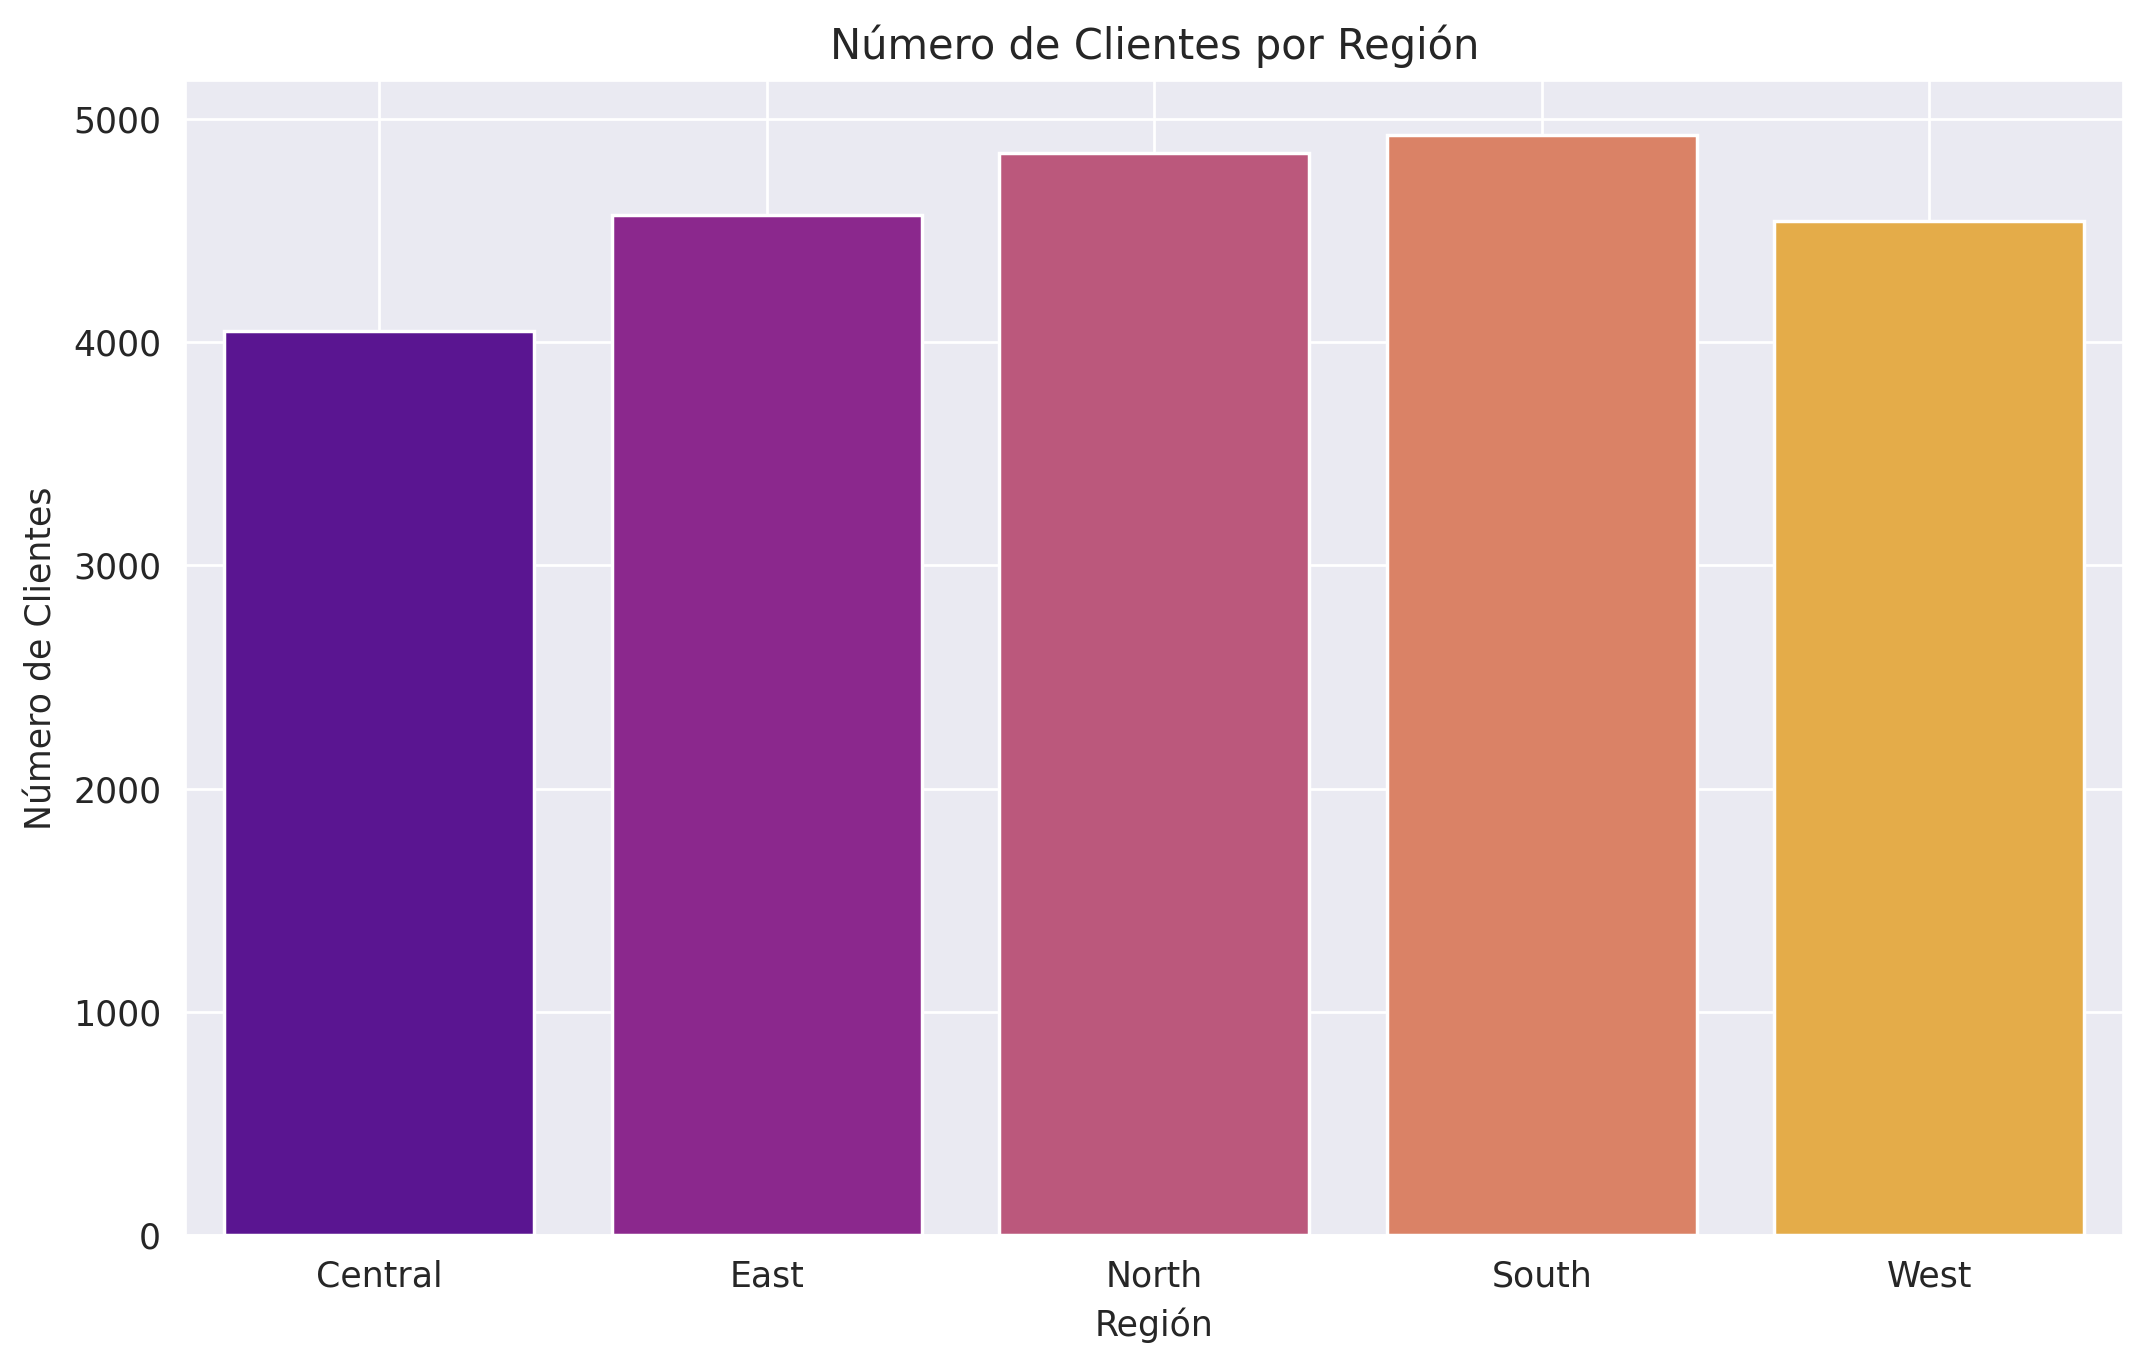

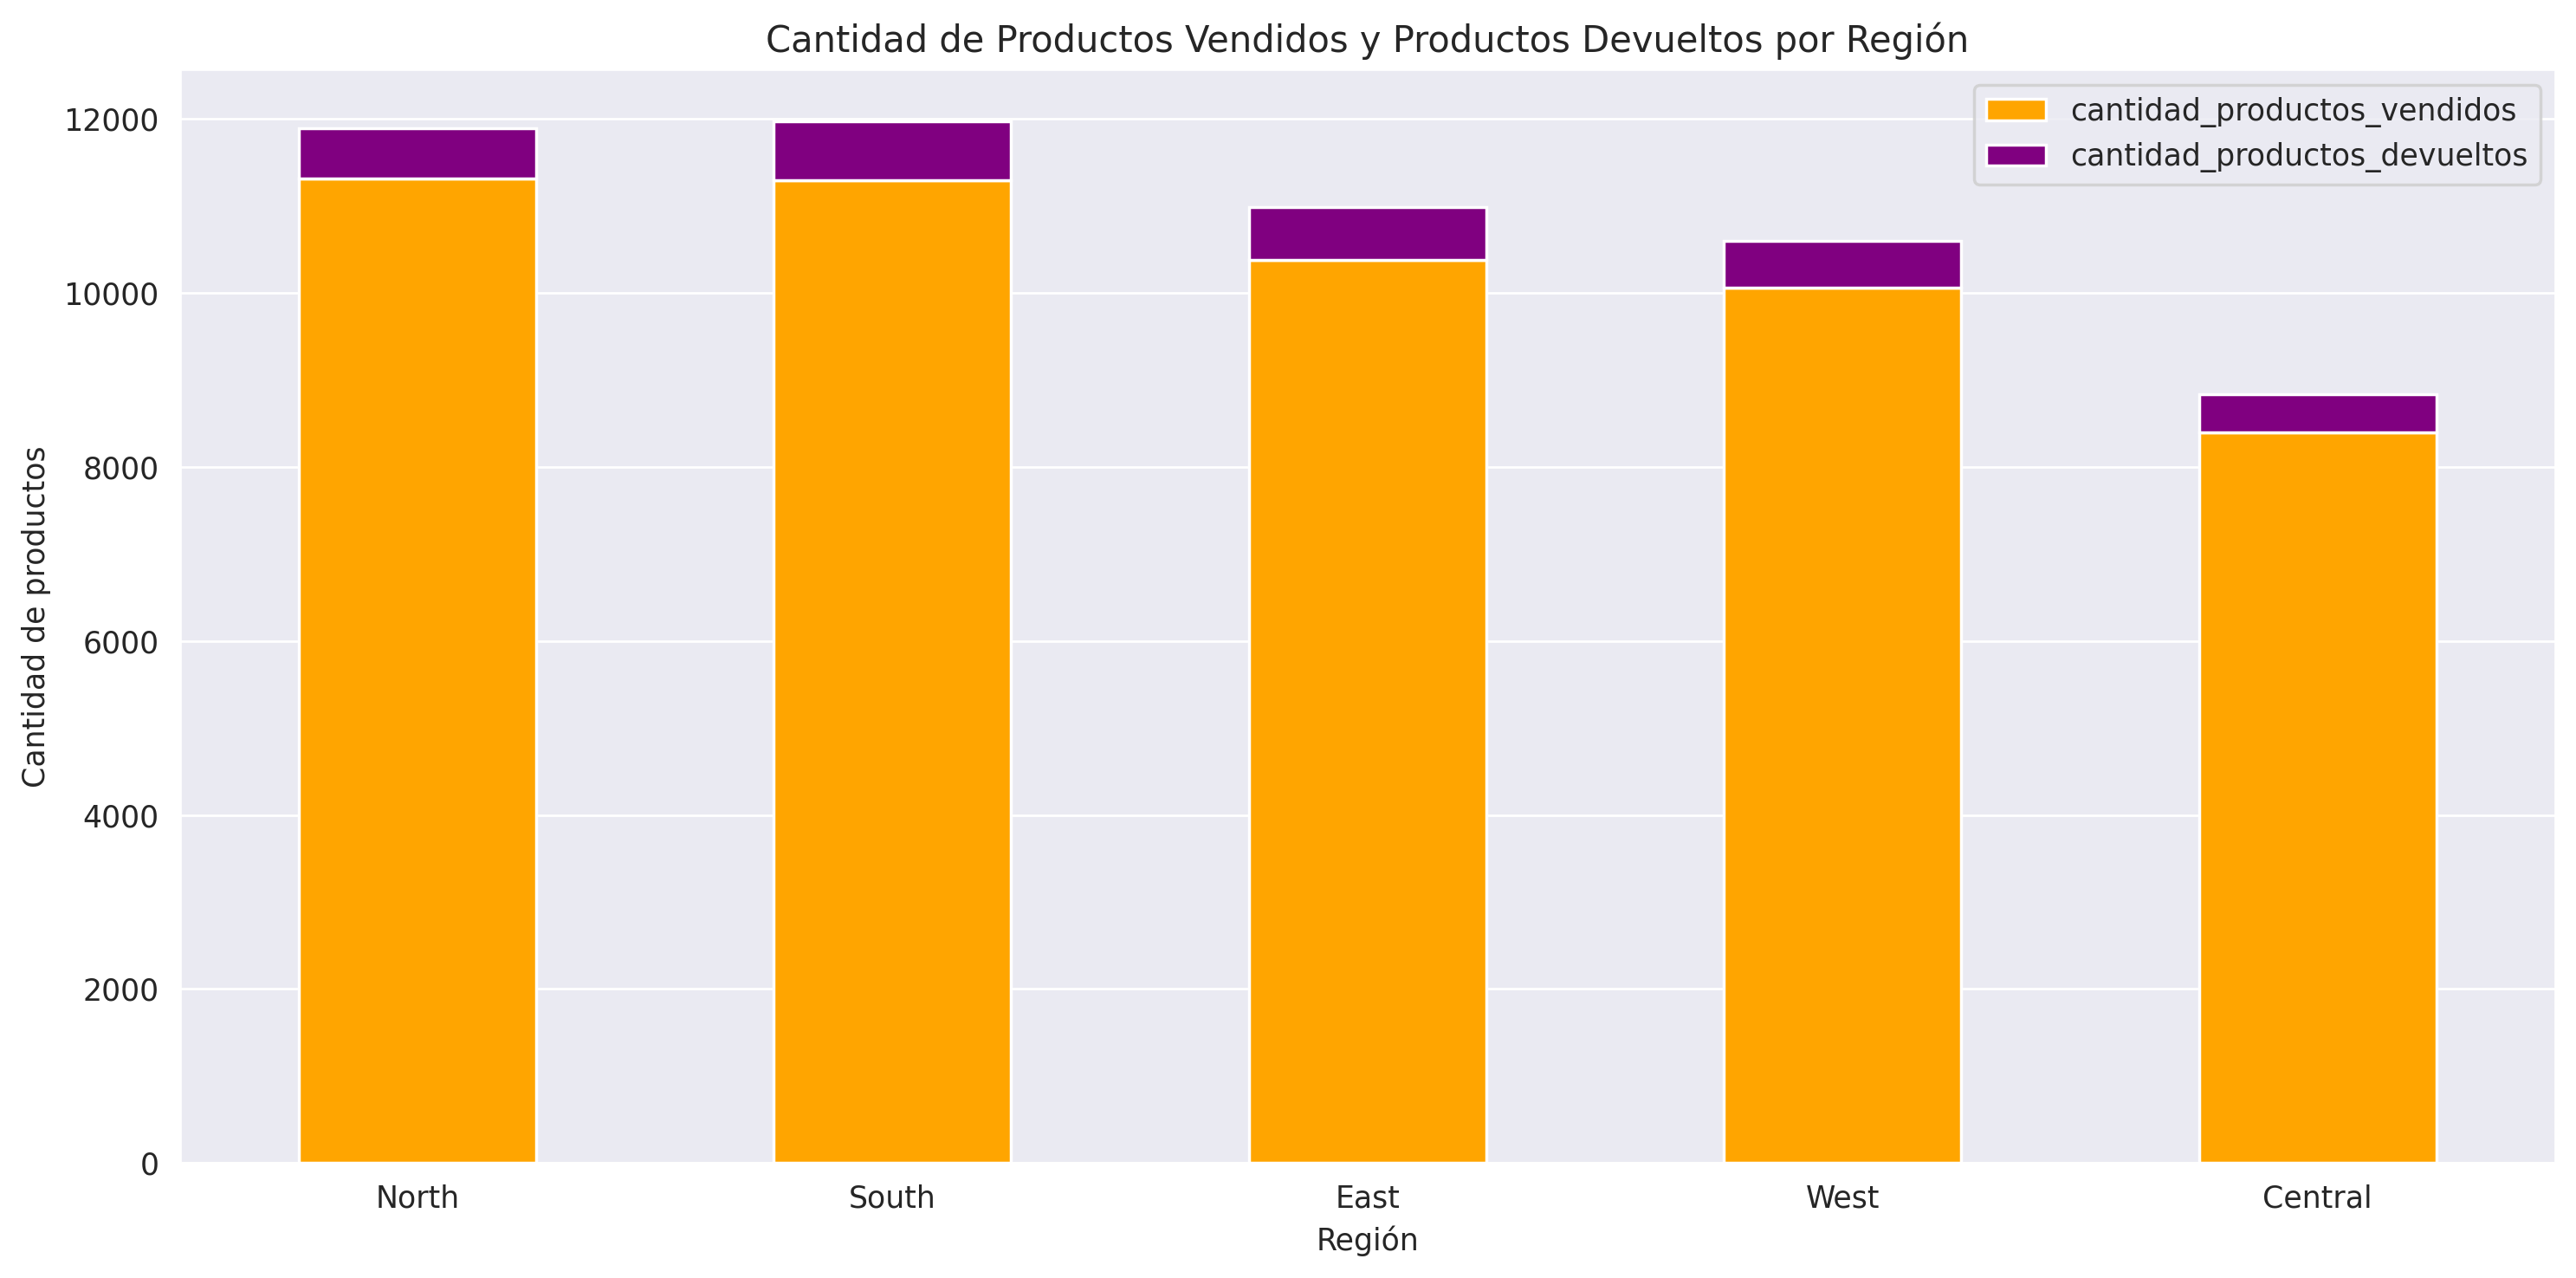

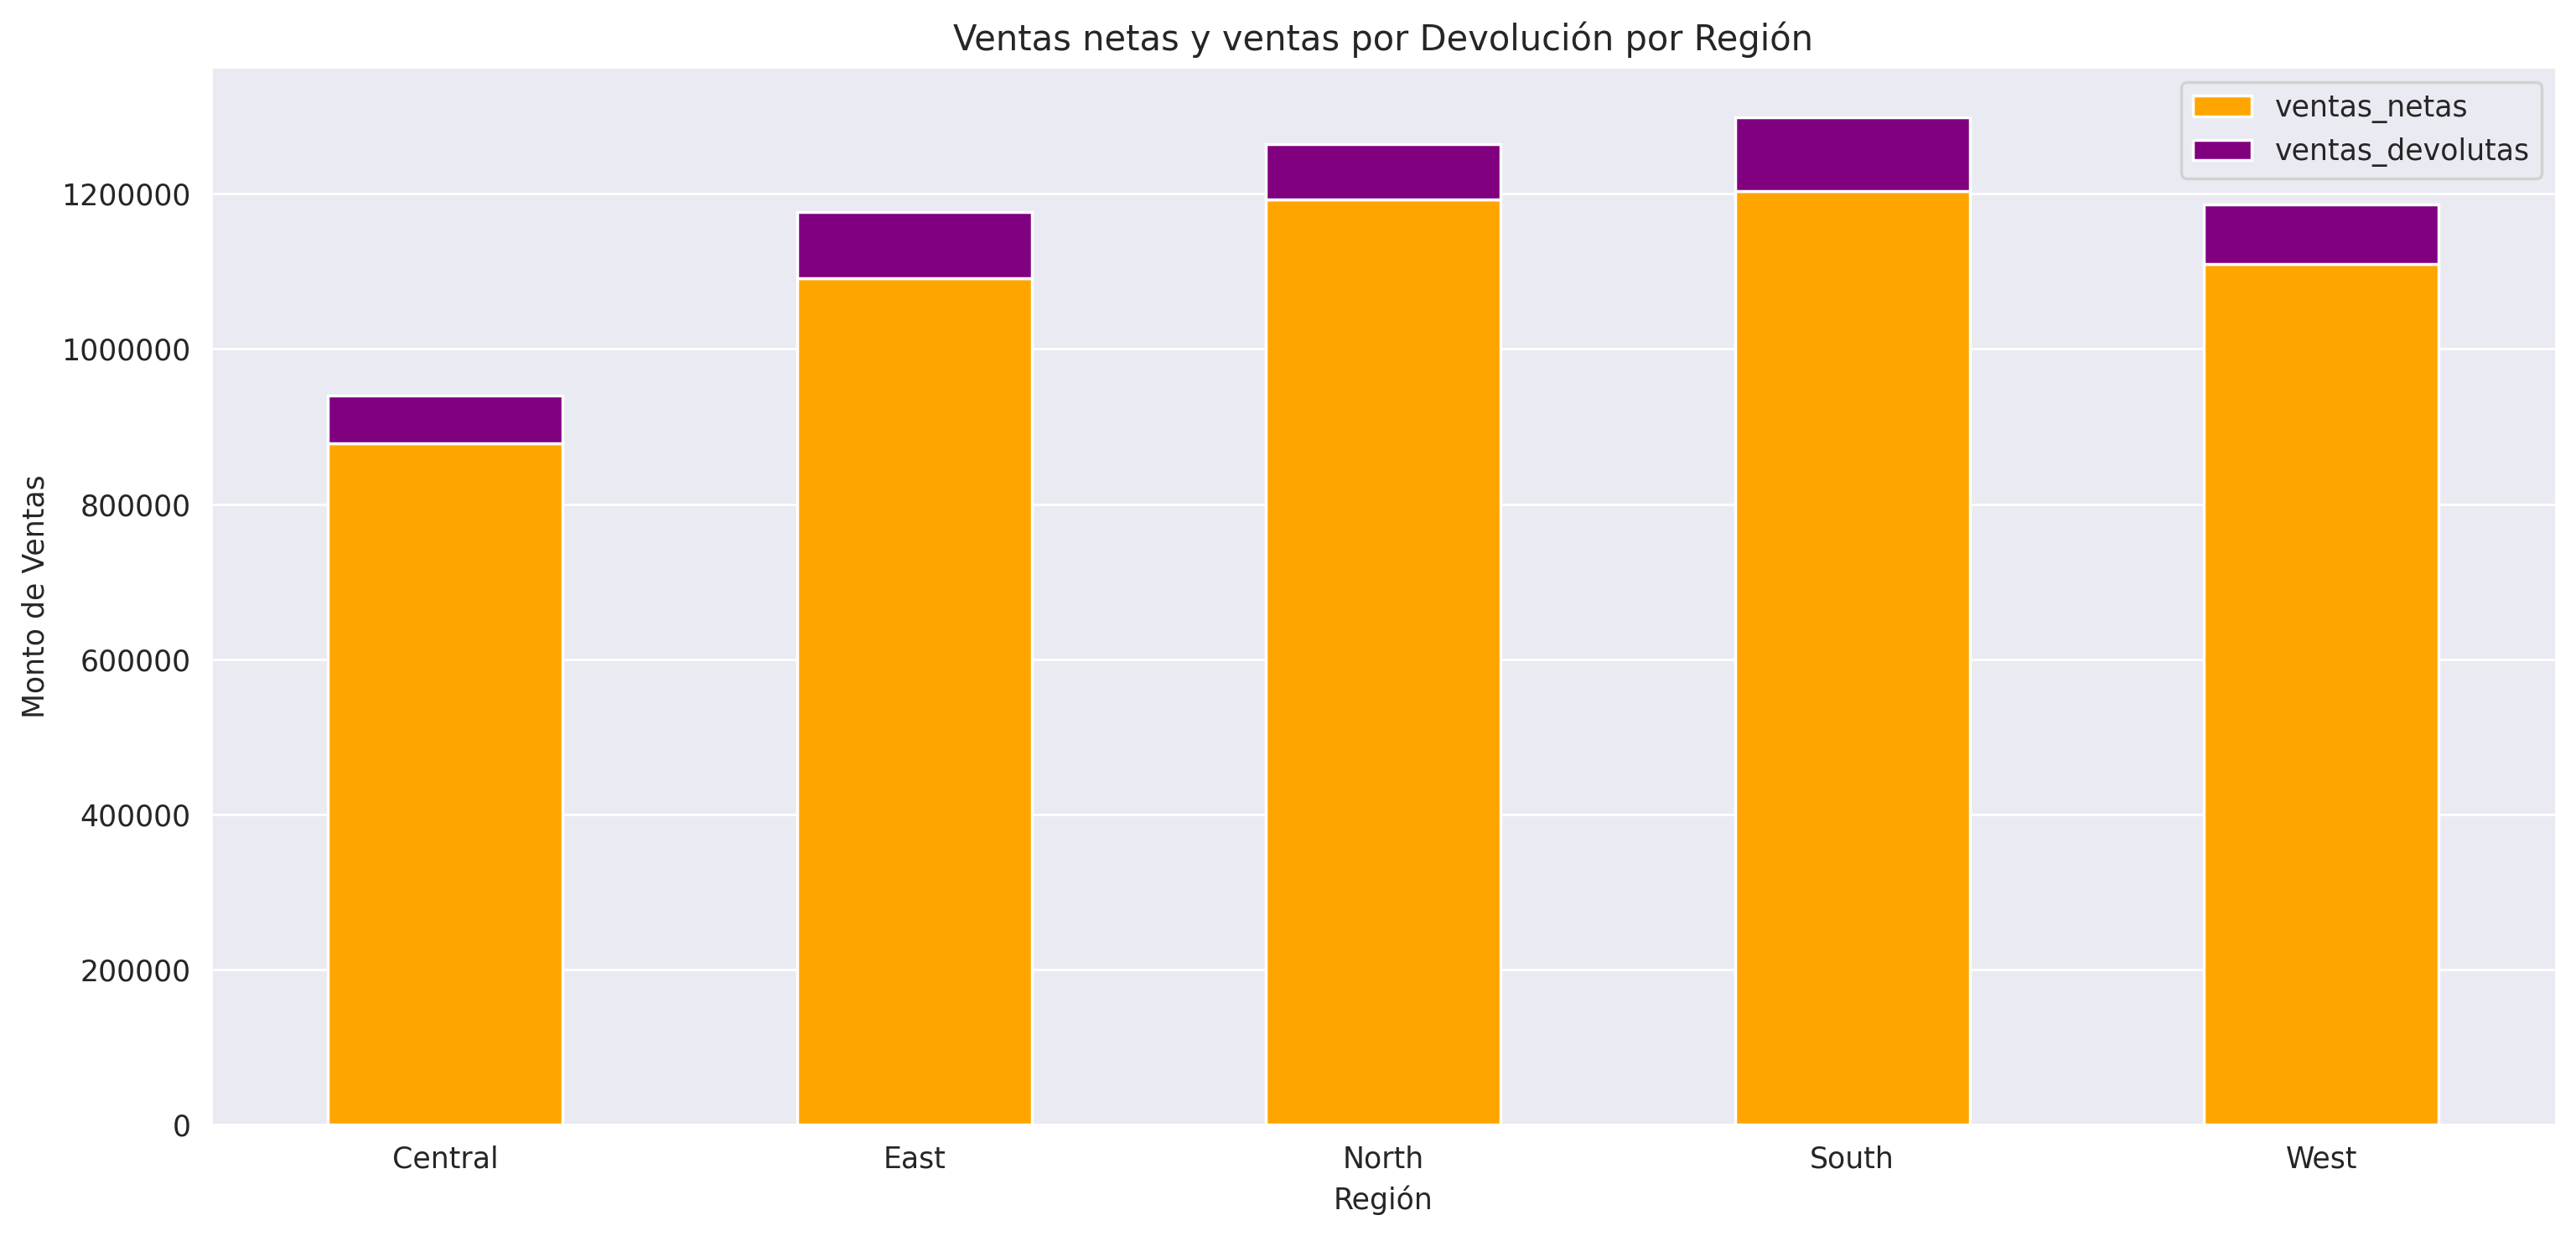

In [9]:
Resumen_region = data.groupby('region').agg(
    numero_clientes=('customer_id', lambda x: x.nunique()),
    dias_entrega_promedio=('delivery_time_days','mean'),
    cantidad_productos_vendidos=('quantity', 'sum'),
    ventas_totales=('total_amount', 'sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount', lambda x: x[data.loc[x.index, 'returned'] == 'No'].sum()),
    costo_total_envio=('shipping_cost','sum'),
    costo_promedio_envio=('shipping_cost','mean'),
    margen_promedio_venta=('profit_margin','mean')
).round(2)
display(Resumen_region.to_markdown())

# Gráfico de cantidad de clientes por región
plt.figure(figsize=(10, 6))
sns.barplot(x=Resumen_region.index, y='numero_clientes', data=Resumen_region,palette='plasma', hue=Resumen_region.index, legend=False)
plt.title('Número de Clientes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')
plt.grid(axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Gráfico de cantidad de artículos vendidos y devueltos por región
Resumen_region_sorted = Resumen_region.sort_values(by='cantidad_productos_vendidos', ascending=False)
Resumen_region_sorted[['cantidad_productos_vendidos', 'cantidad_productos_devueltos']].plot(kind='bar', stacked=True, figsize=(12, 6),color=['orange','purple'])
plt.title('Cantidad de Productos Vendidos y Productos Devueltos por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Gráfico de ventas totales y devoluciones por región
Resumen_region[['ventas_netas', 'ventas_devolutas']].plot(kind='bar', stacked=True, figsize=(12, 6),color=['orange','purple'])
plt.title('Ventas netas y ventas por Devolución por Región')
plt.xlabel('Región')
plt.ylabel('Monto de Ventas')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### **Distribución de ventas por categoría**



'| category    |   numero_clientes |   cantidad_productos_vendidos |   ventas_totales |   cantidad_productos_devueltos |   ventas_devolutas |   cantidad_productos_vendidos_netos |     ventas_netas |\n|:------------|------------------:|------------------------------:|-----------------:|-------------------------------:|-------------------:|------------------------------------:|-----------------:|\n| Beauty      |              3192 |                          6122 | 153019           |                            225 |            6242.39 |                                5897 | 146777           |\n| Electronics |              4257 |                          9343 |      3.31921e+06 |                            679 |          245099    |                                8664 |      3.07411e+06 |\n| Fashion     |              4358 |                          9148 | 471546           |                            763 |           37644.7  |                                8385 | 433901           |\n| Gr

/tmp/ipython-input-1499427896.py:14: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x=Resumen_categoría.index, y='numero_clientes',data=Resumen_categoría,palette=custom_palette_1, hue=Resumen_categoría.index, legend=False)


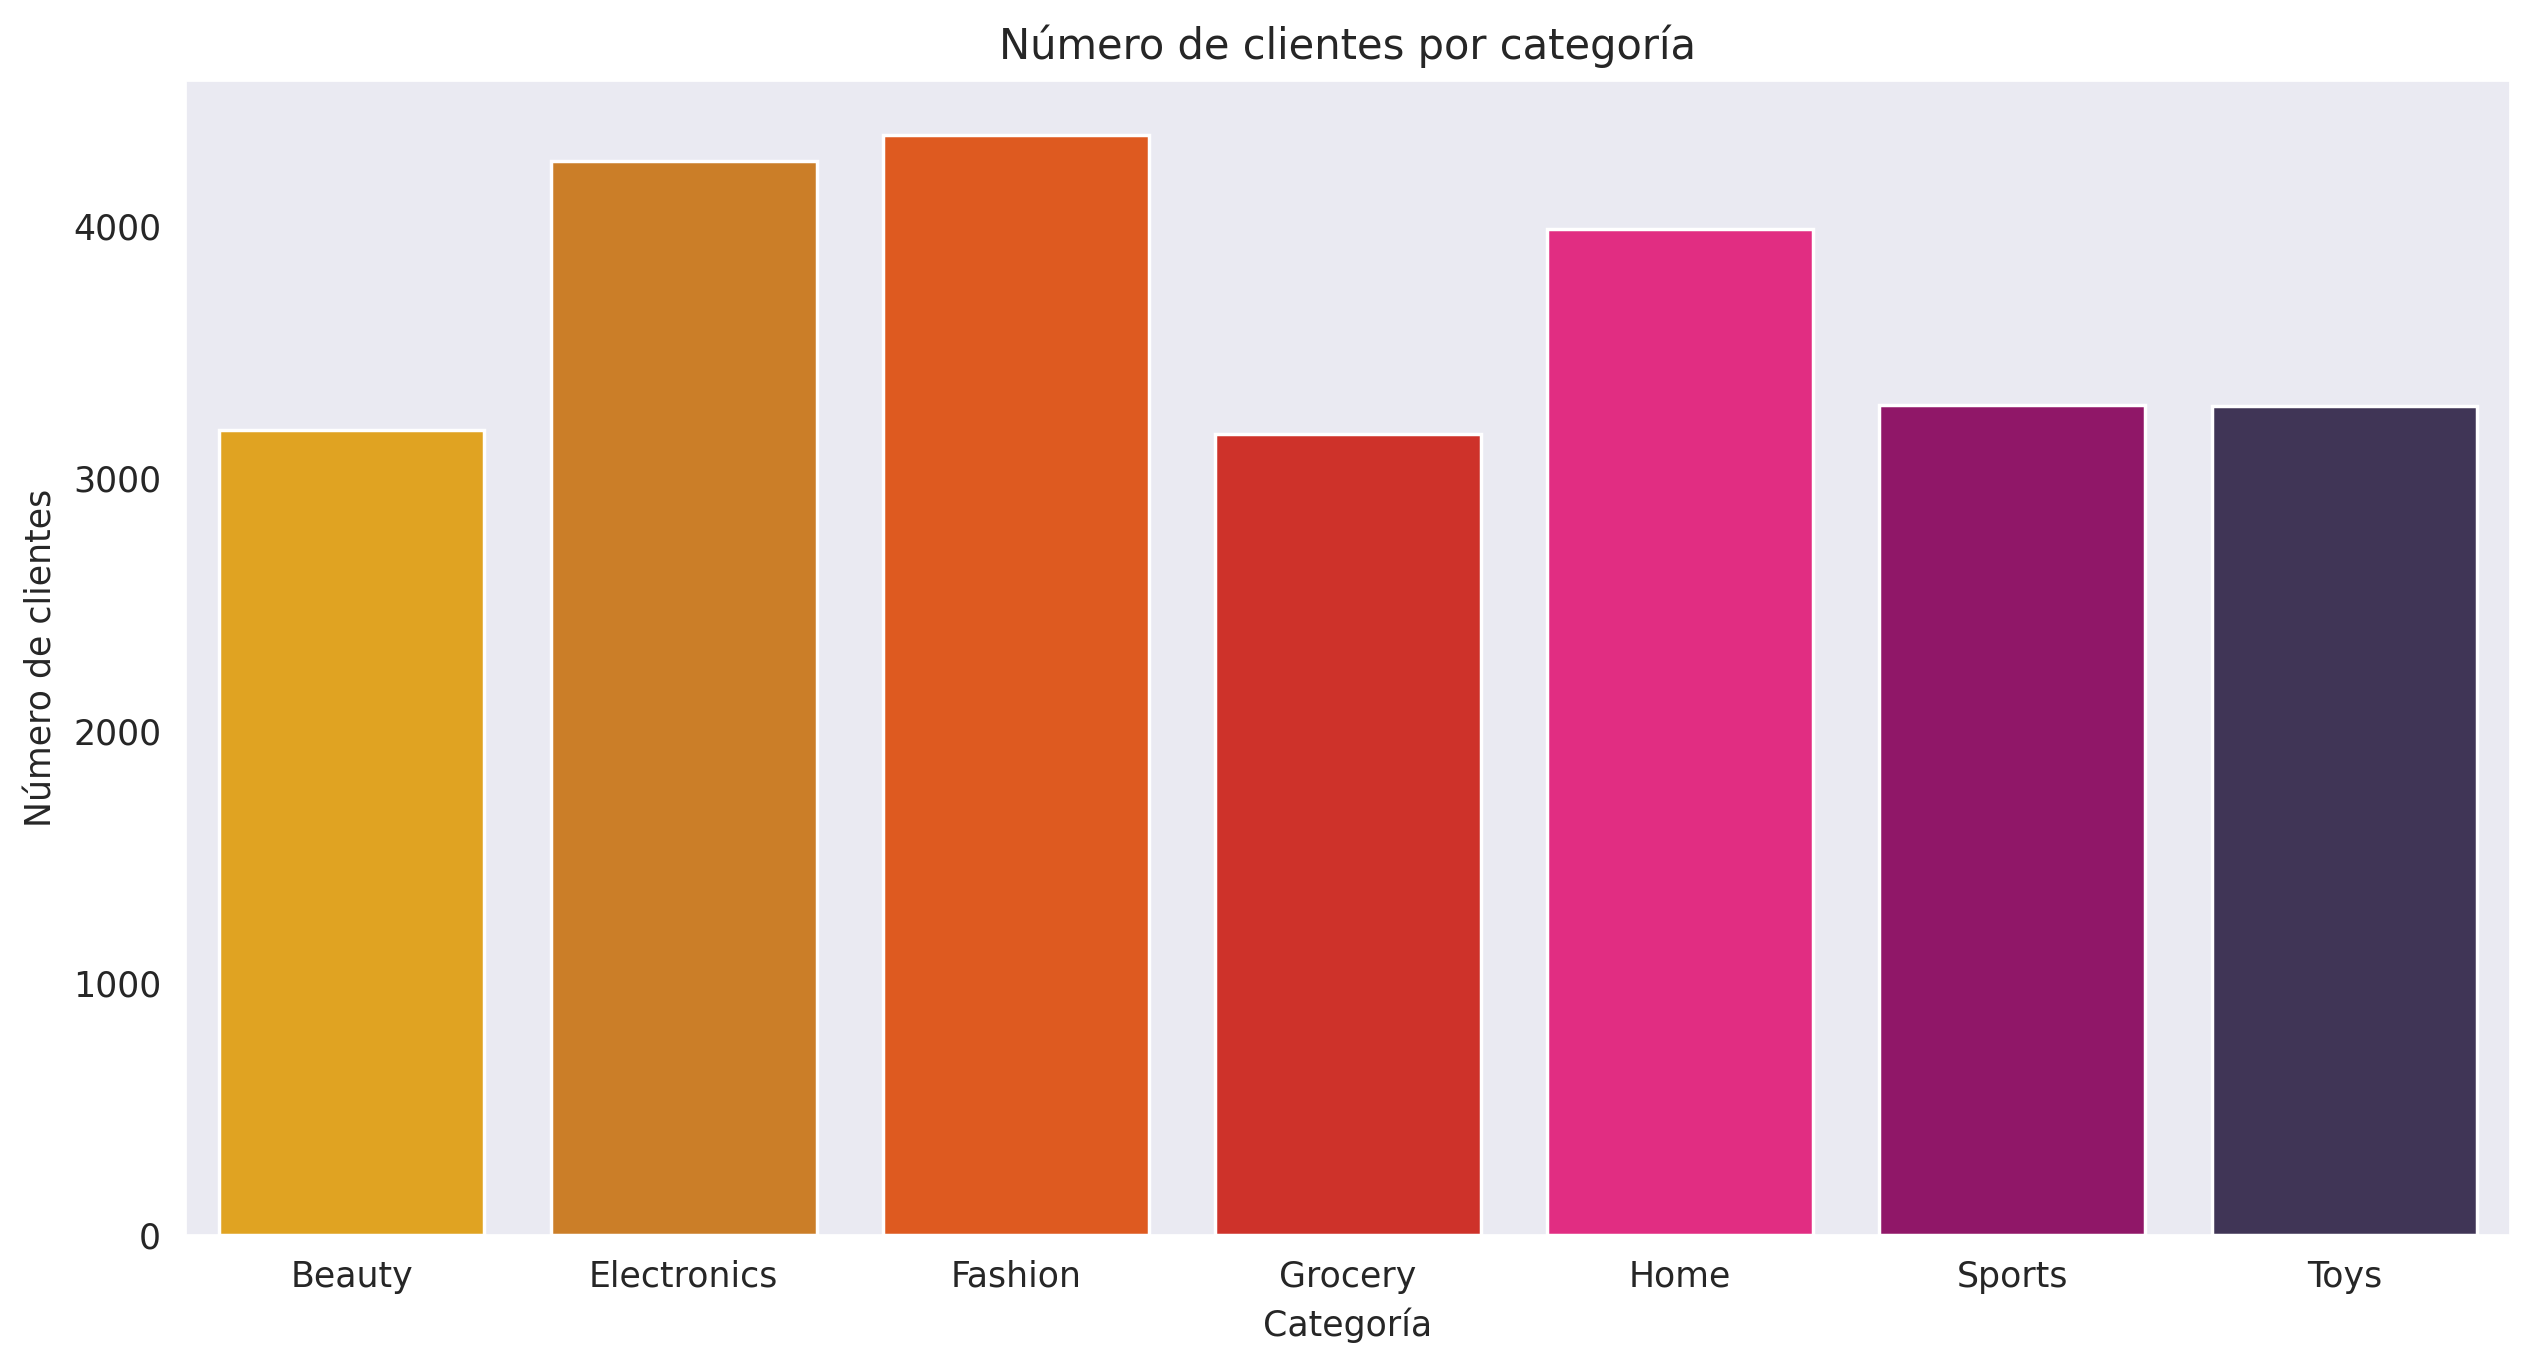

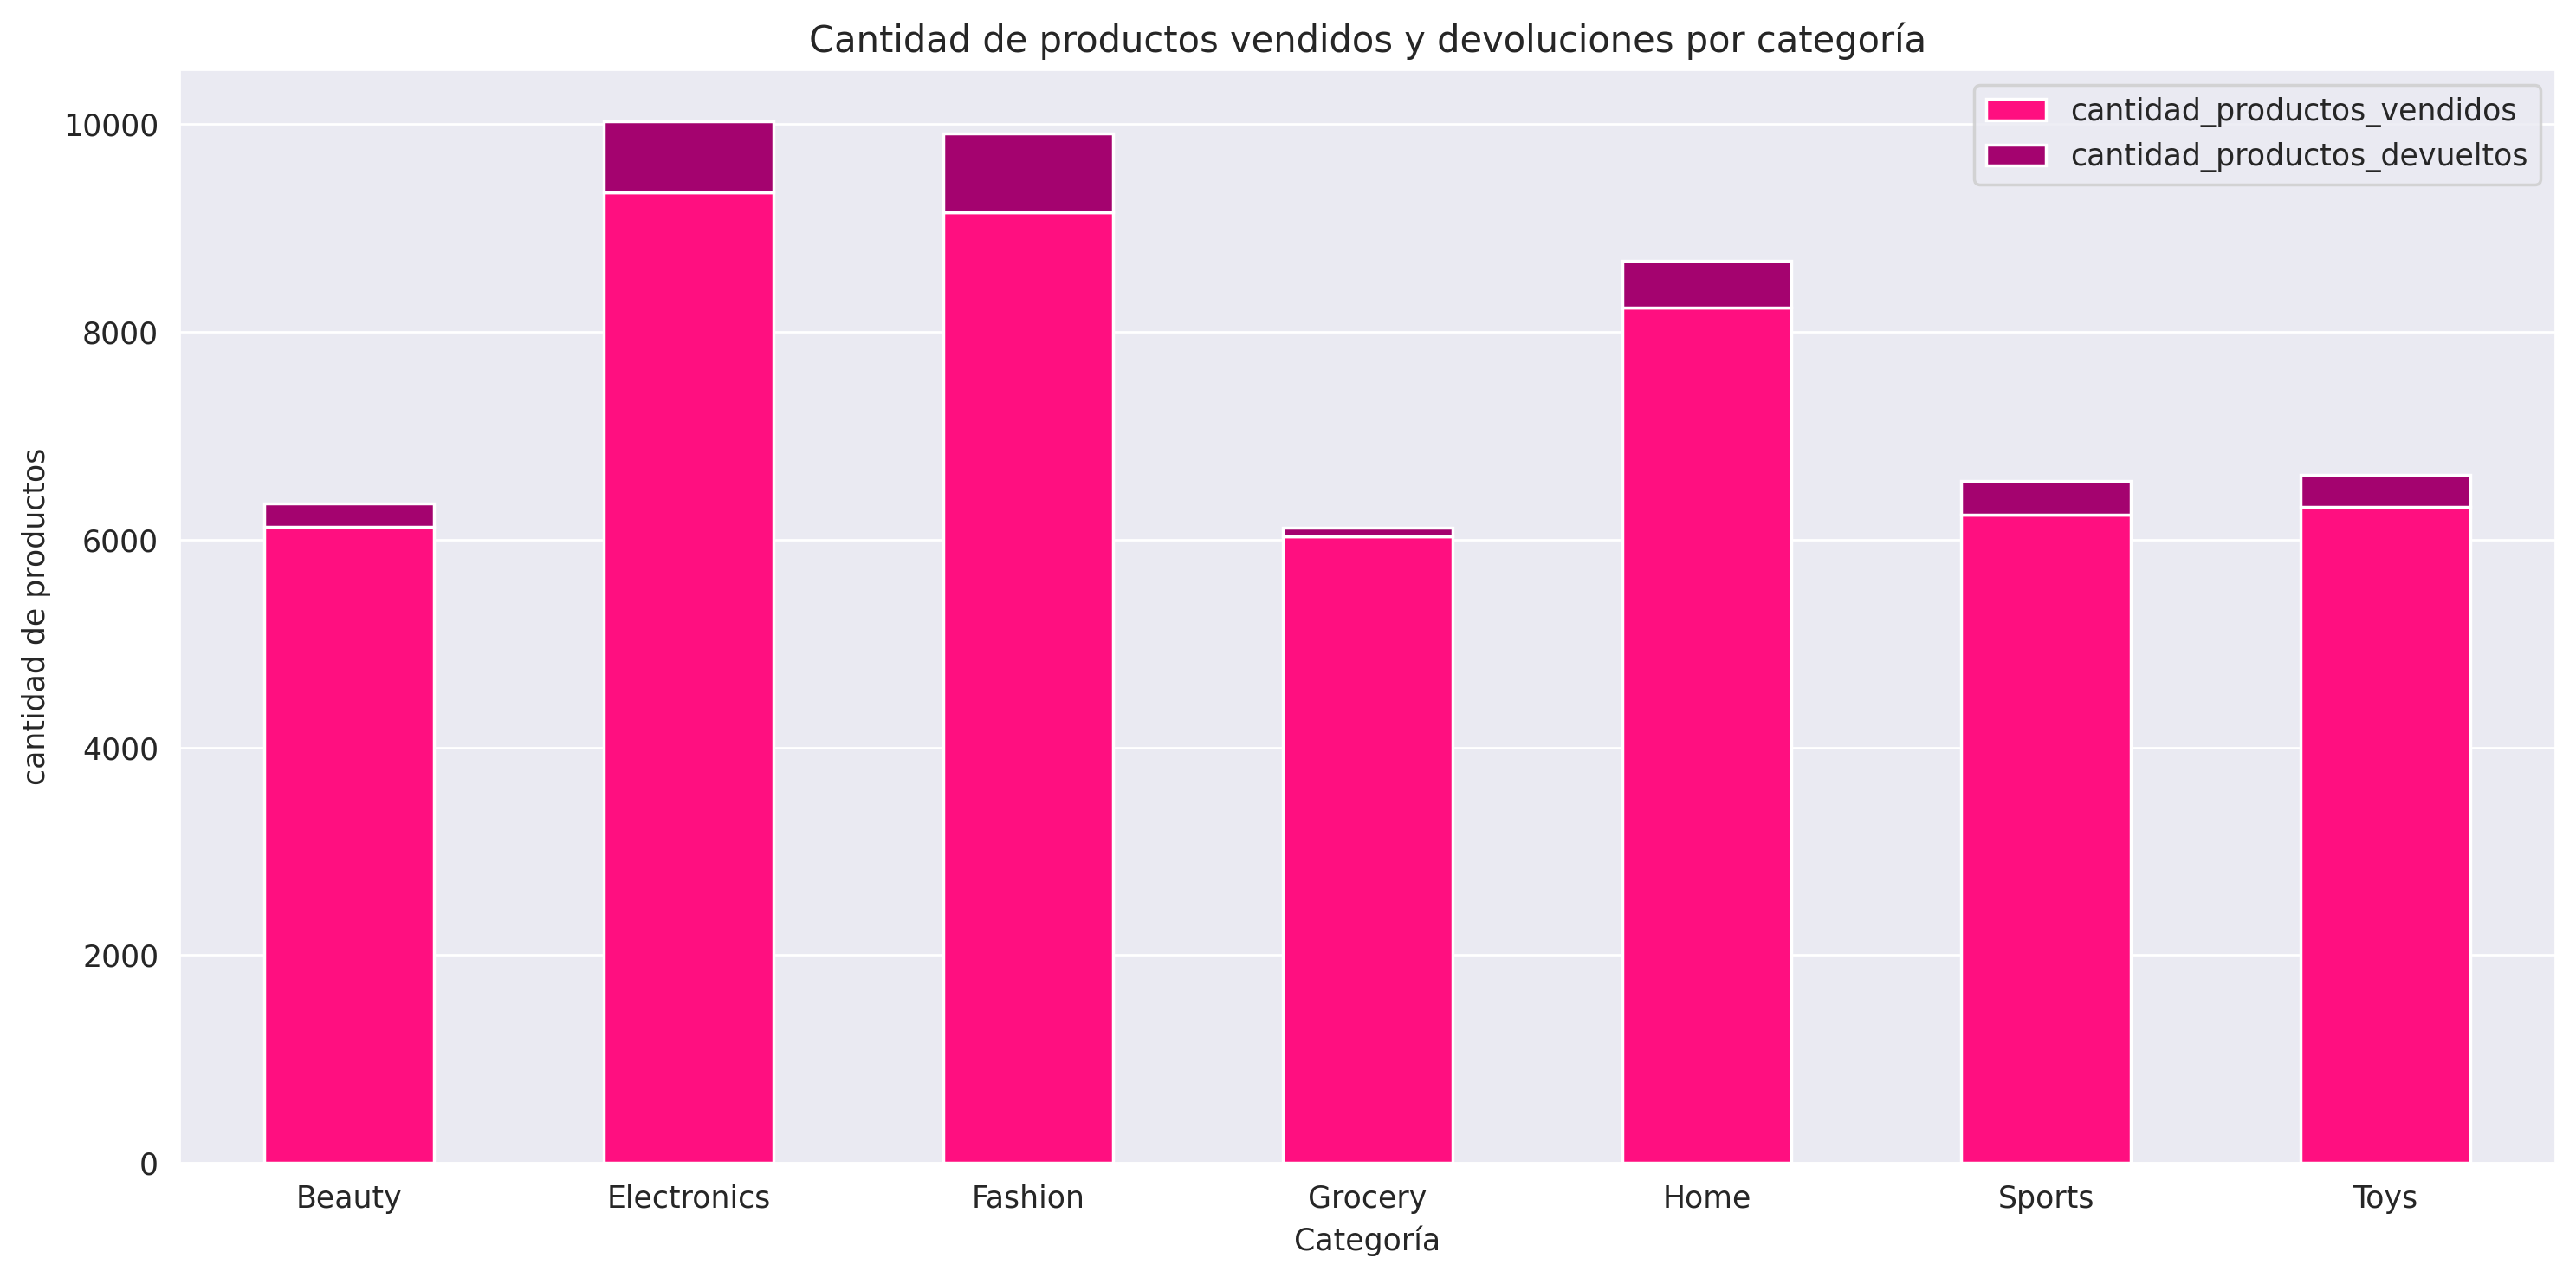

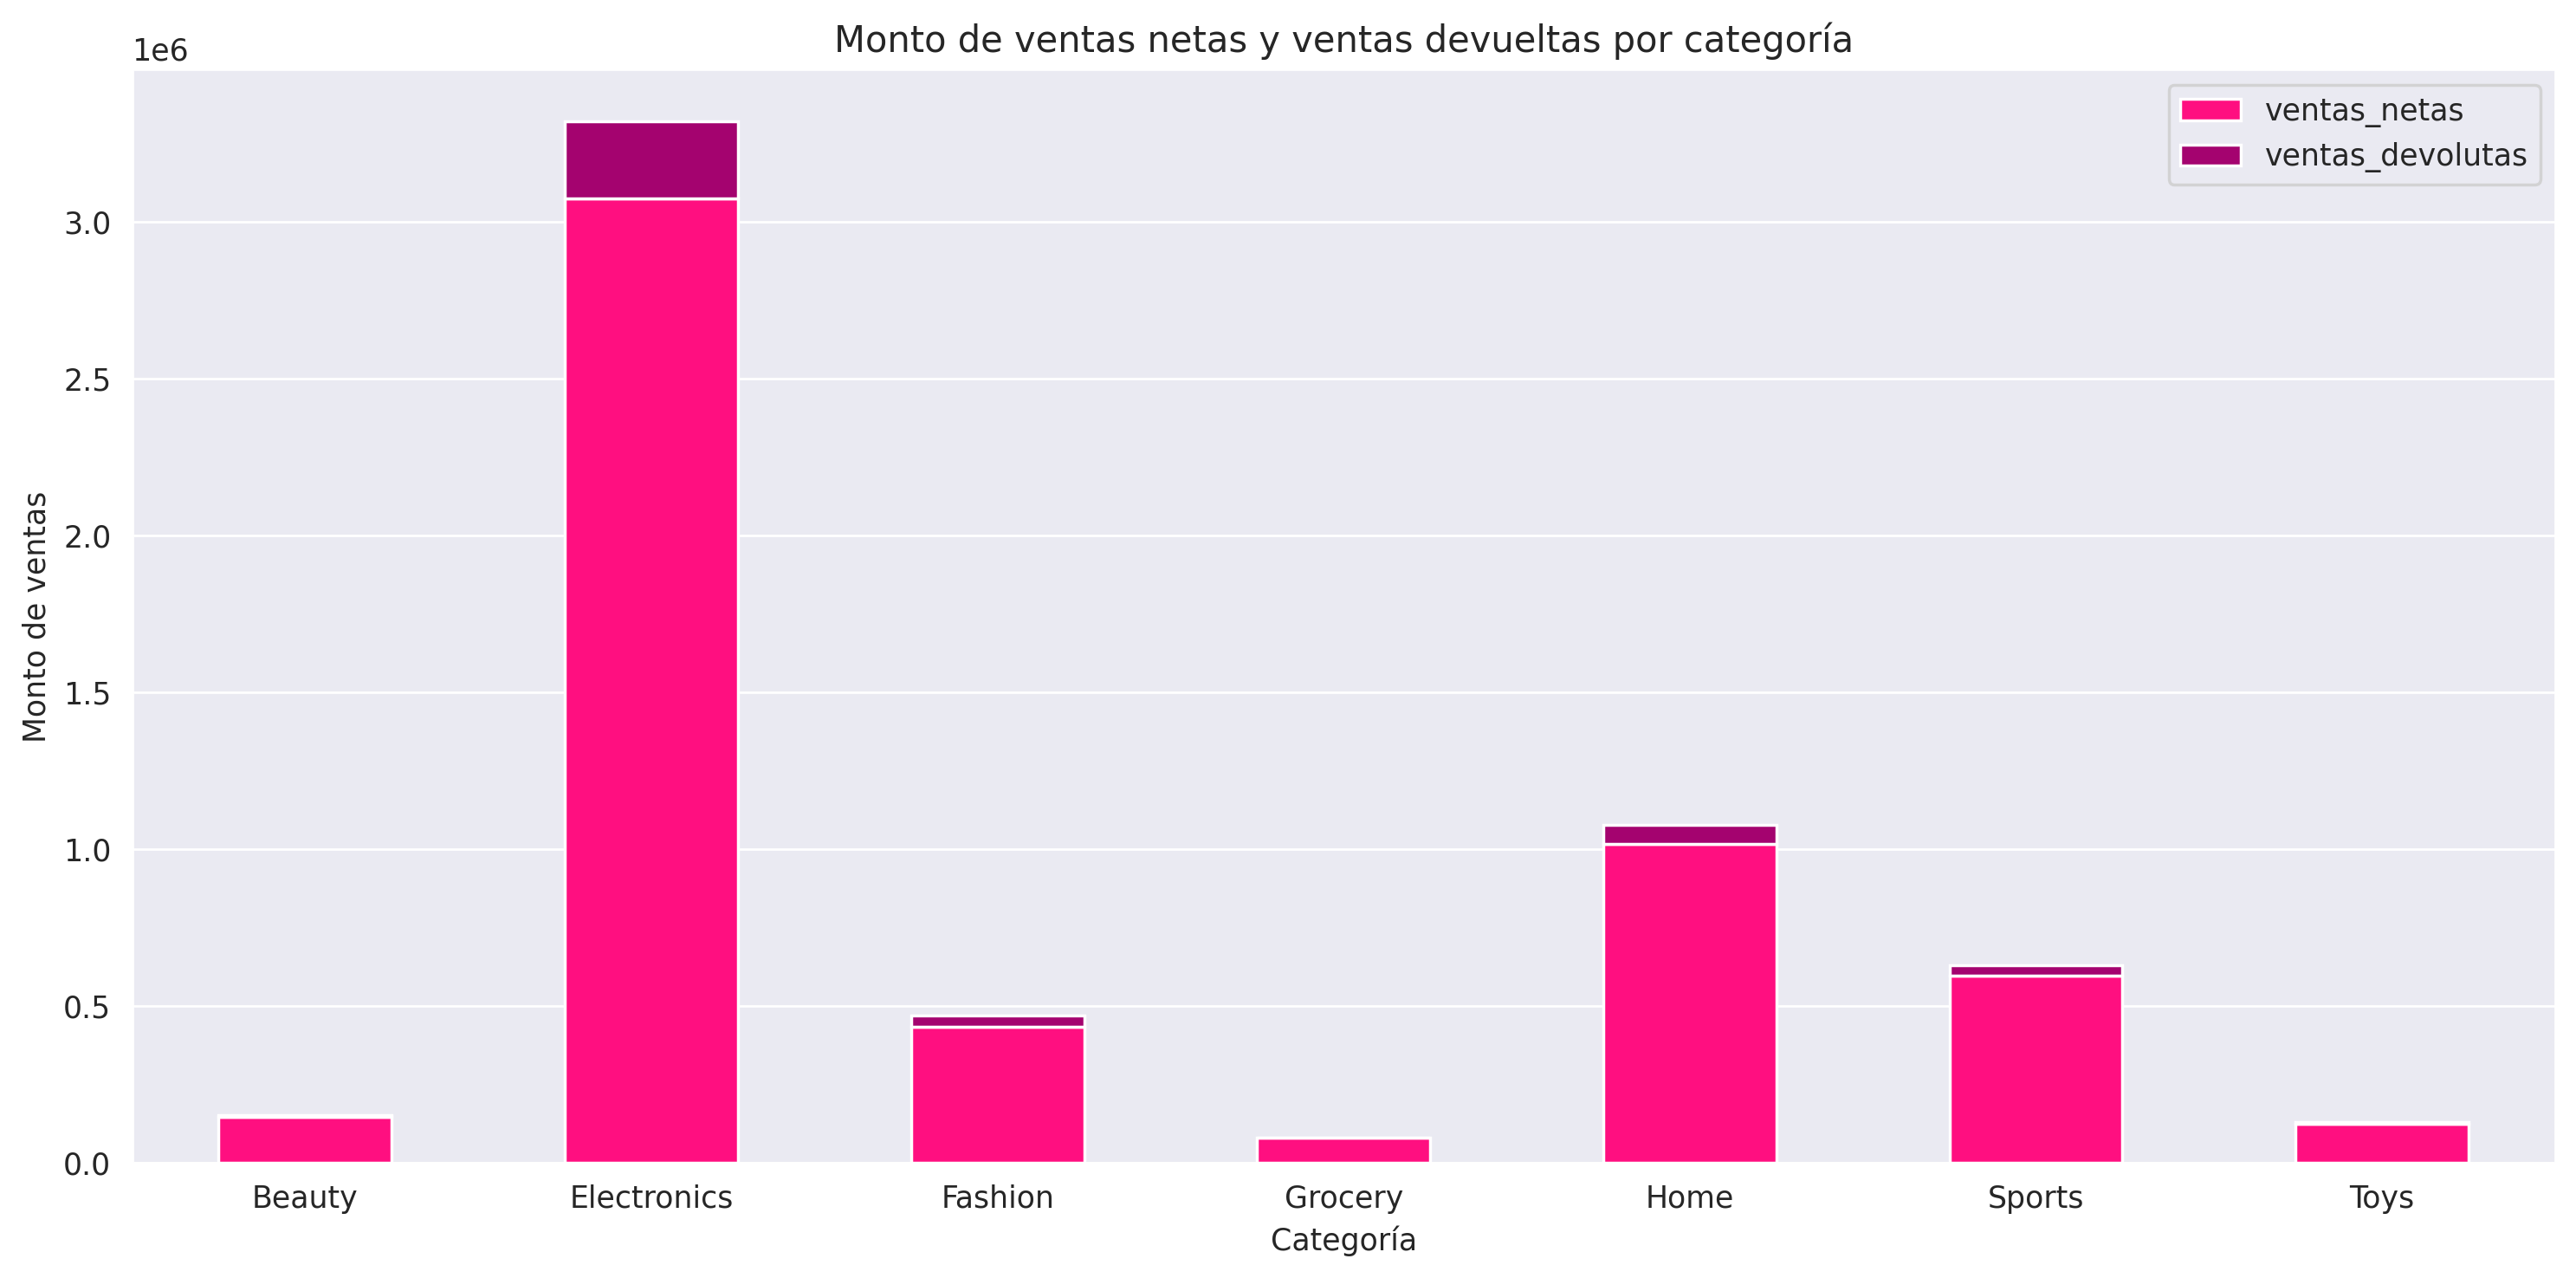

In [10]:
Resumen_categoría= data.groupby('category').agg(
    numero_clientes=('customer_id', lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    ventas_totales=('total_amount','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount',lambda x: x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum())
).round(2)
display(Resumen_categoría.to_markdown())

# Gráfico de cantidad de clientes por categoría
plt.figure(figsize=(12,6))
sns.barplot(x=Resumen_categoría.index, y='numero_clientes',data=Resumen_categoría,palette=custom_palette_1, hue=Resumen_categoría.index, legend=False)
plt.title('Número de clientes por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.show()

# Gráfico de cantidad de artículos vendidos y devueltos por categoría
Resumen_categoría[['cantidad_productos_vendidos','cantidad_productos_devueltos']].plot(kind='bar',stacked=True,figsize=(12,6),color=custom_palette_1[4:6])
plt.title('Cantidad de productos vendidos y devoluciones por categoría')
plt.xlabel('Categoría')
plt.ylabel('cantidad de productos')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfico de ventas totales y devoluciones por categoría
Resumen_categoría[['ventas_netas','ventas_devolutas']].plot(kind='bar',stacked=True,figsize=(12,6),color=custom_palette_1[4:6])
plt.title('Monto de ventas netas y ventas devueltas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto de ventas')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

##### **Distribución de ventas por método de pago**


'| payment_method   |   numero_clientes |   cantidad_productos_vendidos |   ventas_totales |   cantidad_productos_devueltos |   ventas_devolutas |   cantidad_productos_vendidos_netos |     ventas_netas |\n|:-----------------|------------------:|------------------------------:|-----------------:|-------------------------------:|-------------------:|------------------------------------:|-----------------:|\n| COD              |              3196 |                          6163 | 715572           |                            321 |            47967.2 |                                5842 | 667605           |\n| Credit Card      |              6255 |                         18241 |      2.05679e+06 |                           1044 |           146166   |                               17197 |      1.91062e+06 |\n| Debit Card       |              5286 |                         12581 |      1.46021e+06 |                            720 |            94255.6 |                               11861 |

/tmp/ipython-input-44275974.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Resumen_categoría.index,y='numero_clientes',data=Resumen_categoría,palette='pastel')


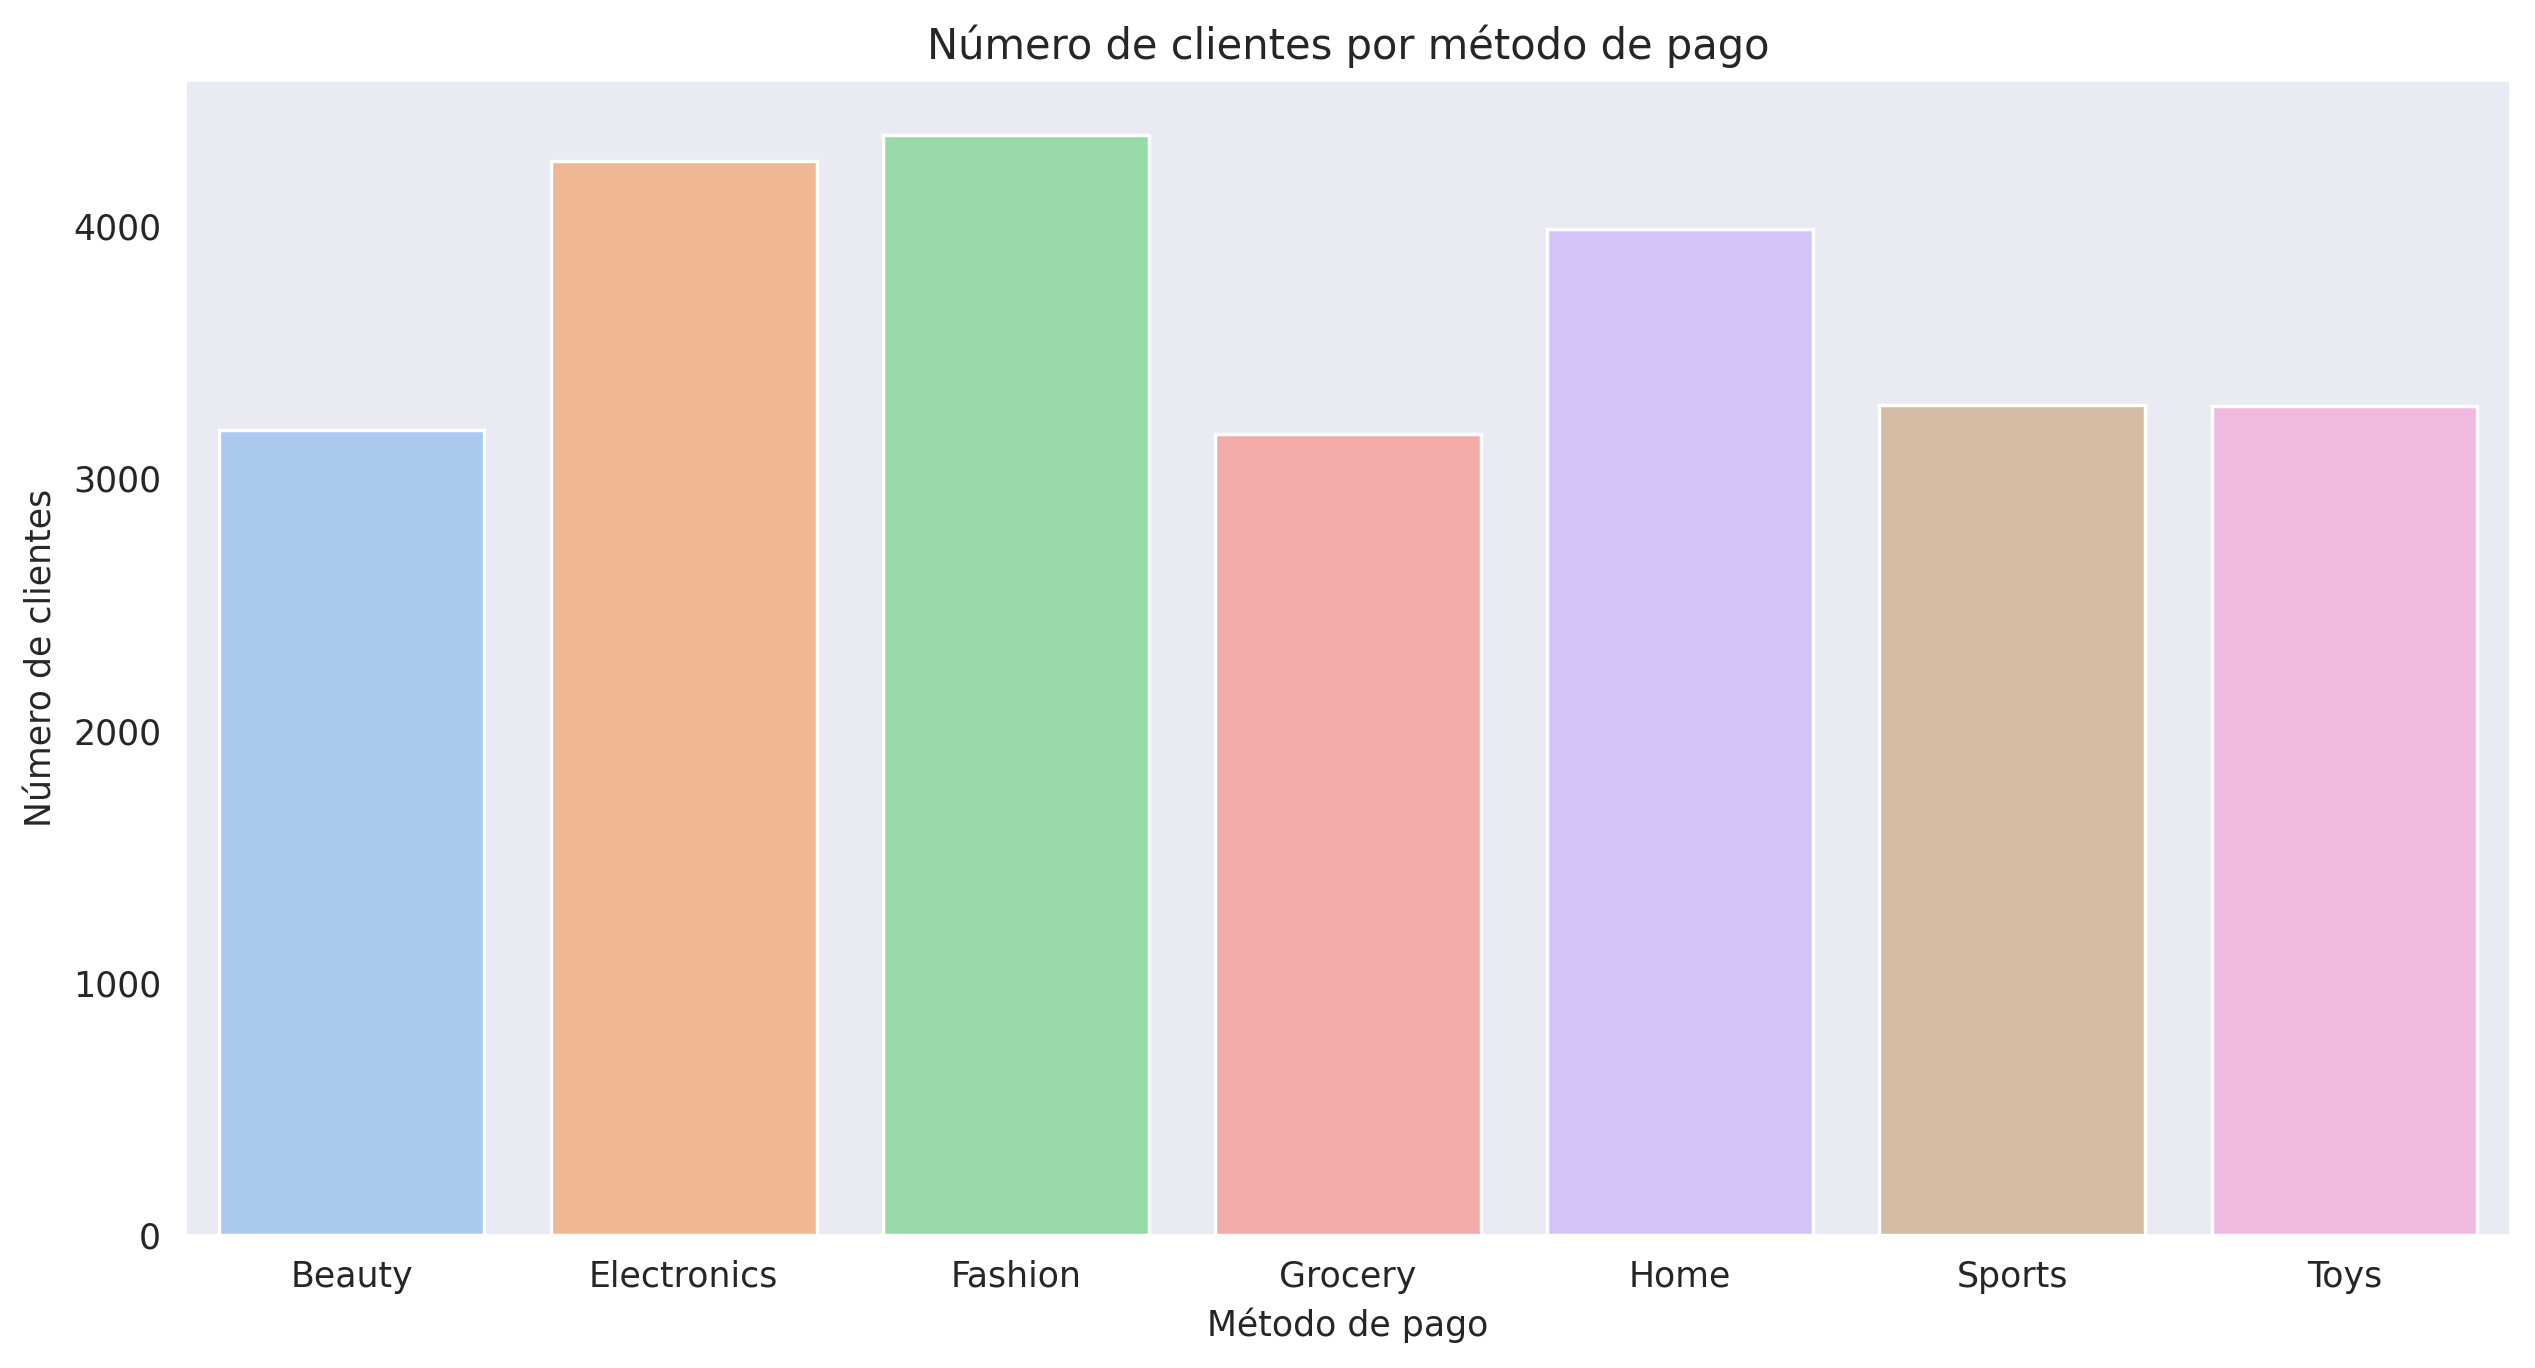

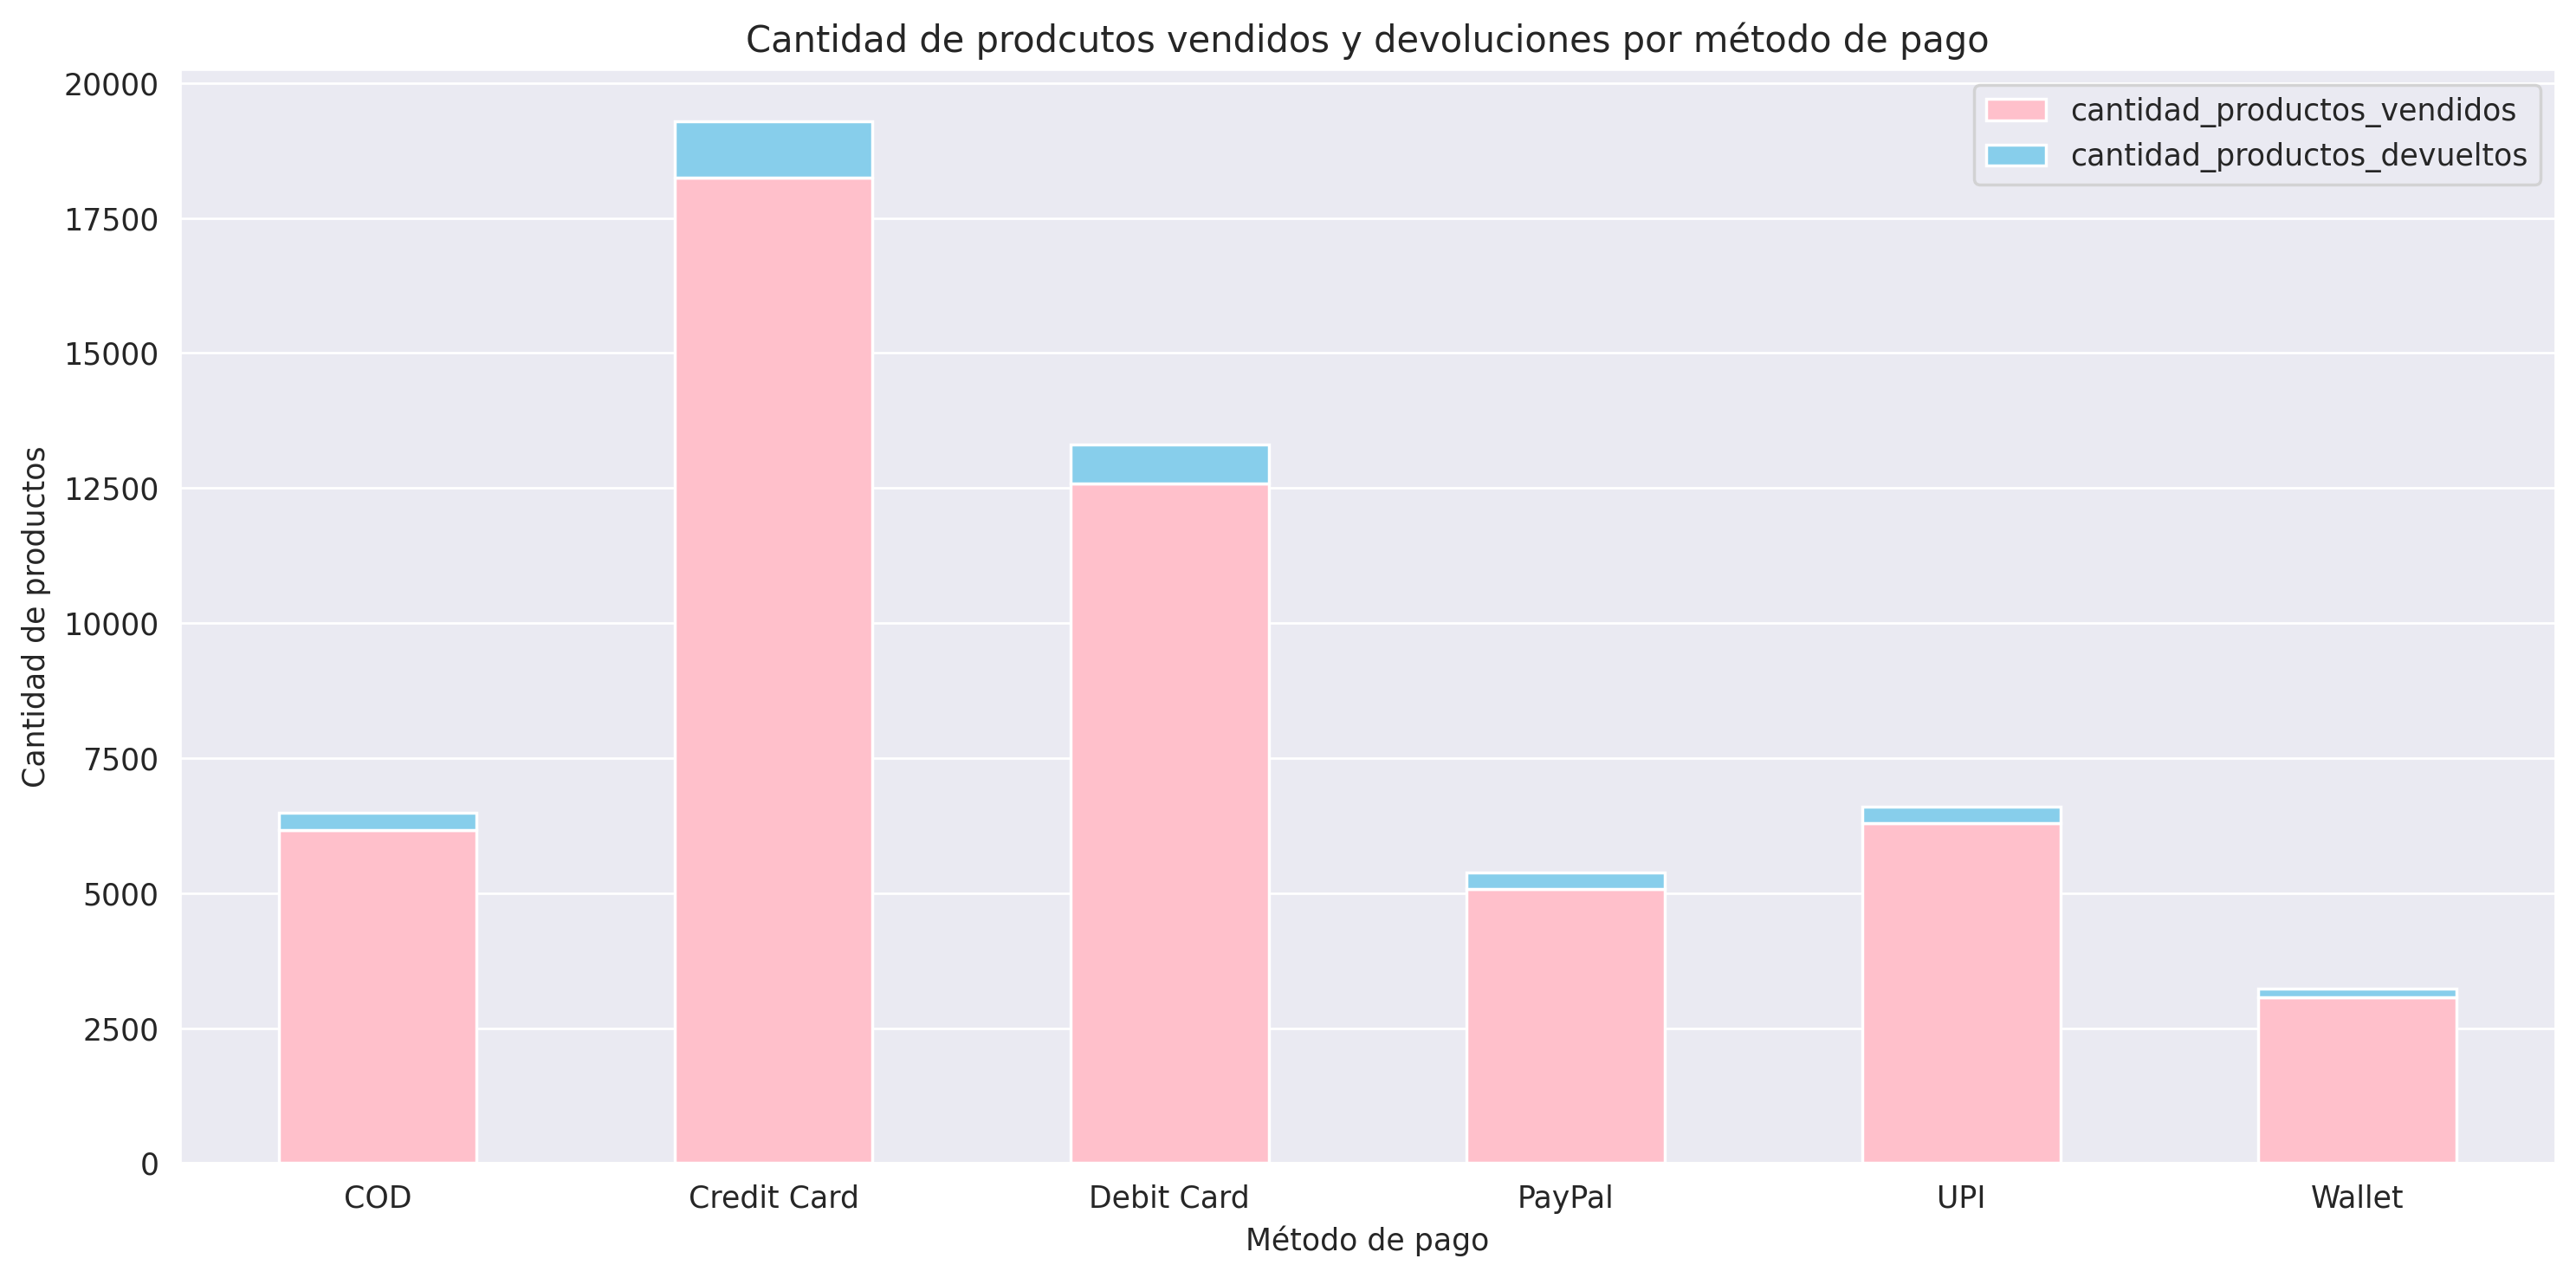

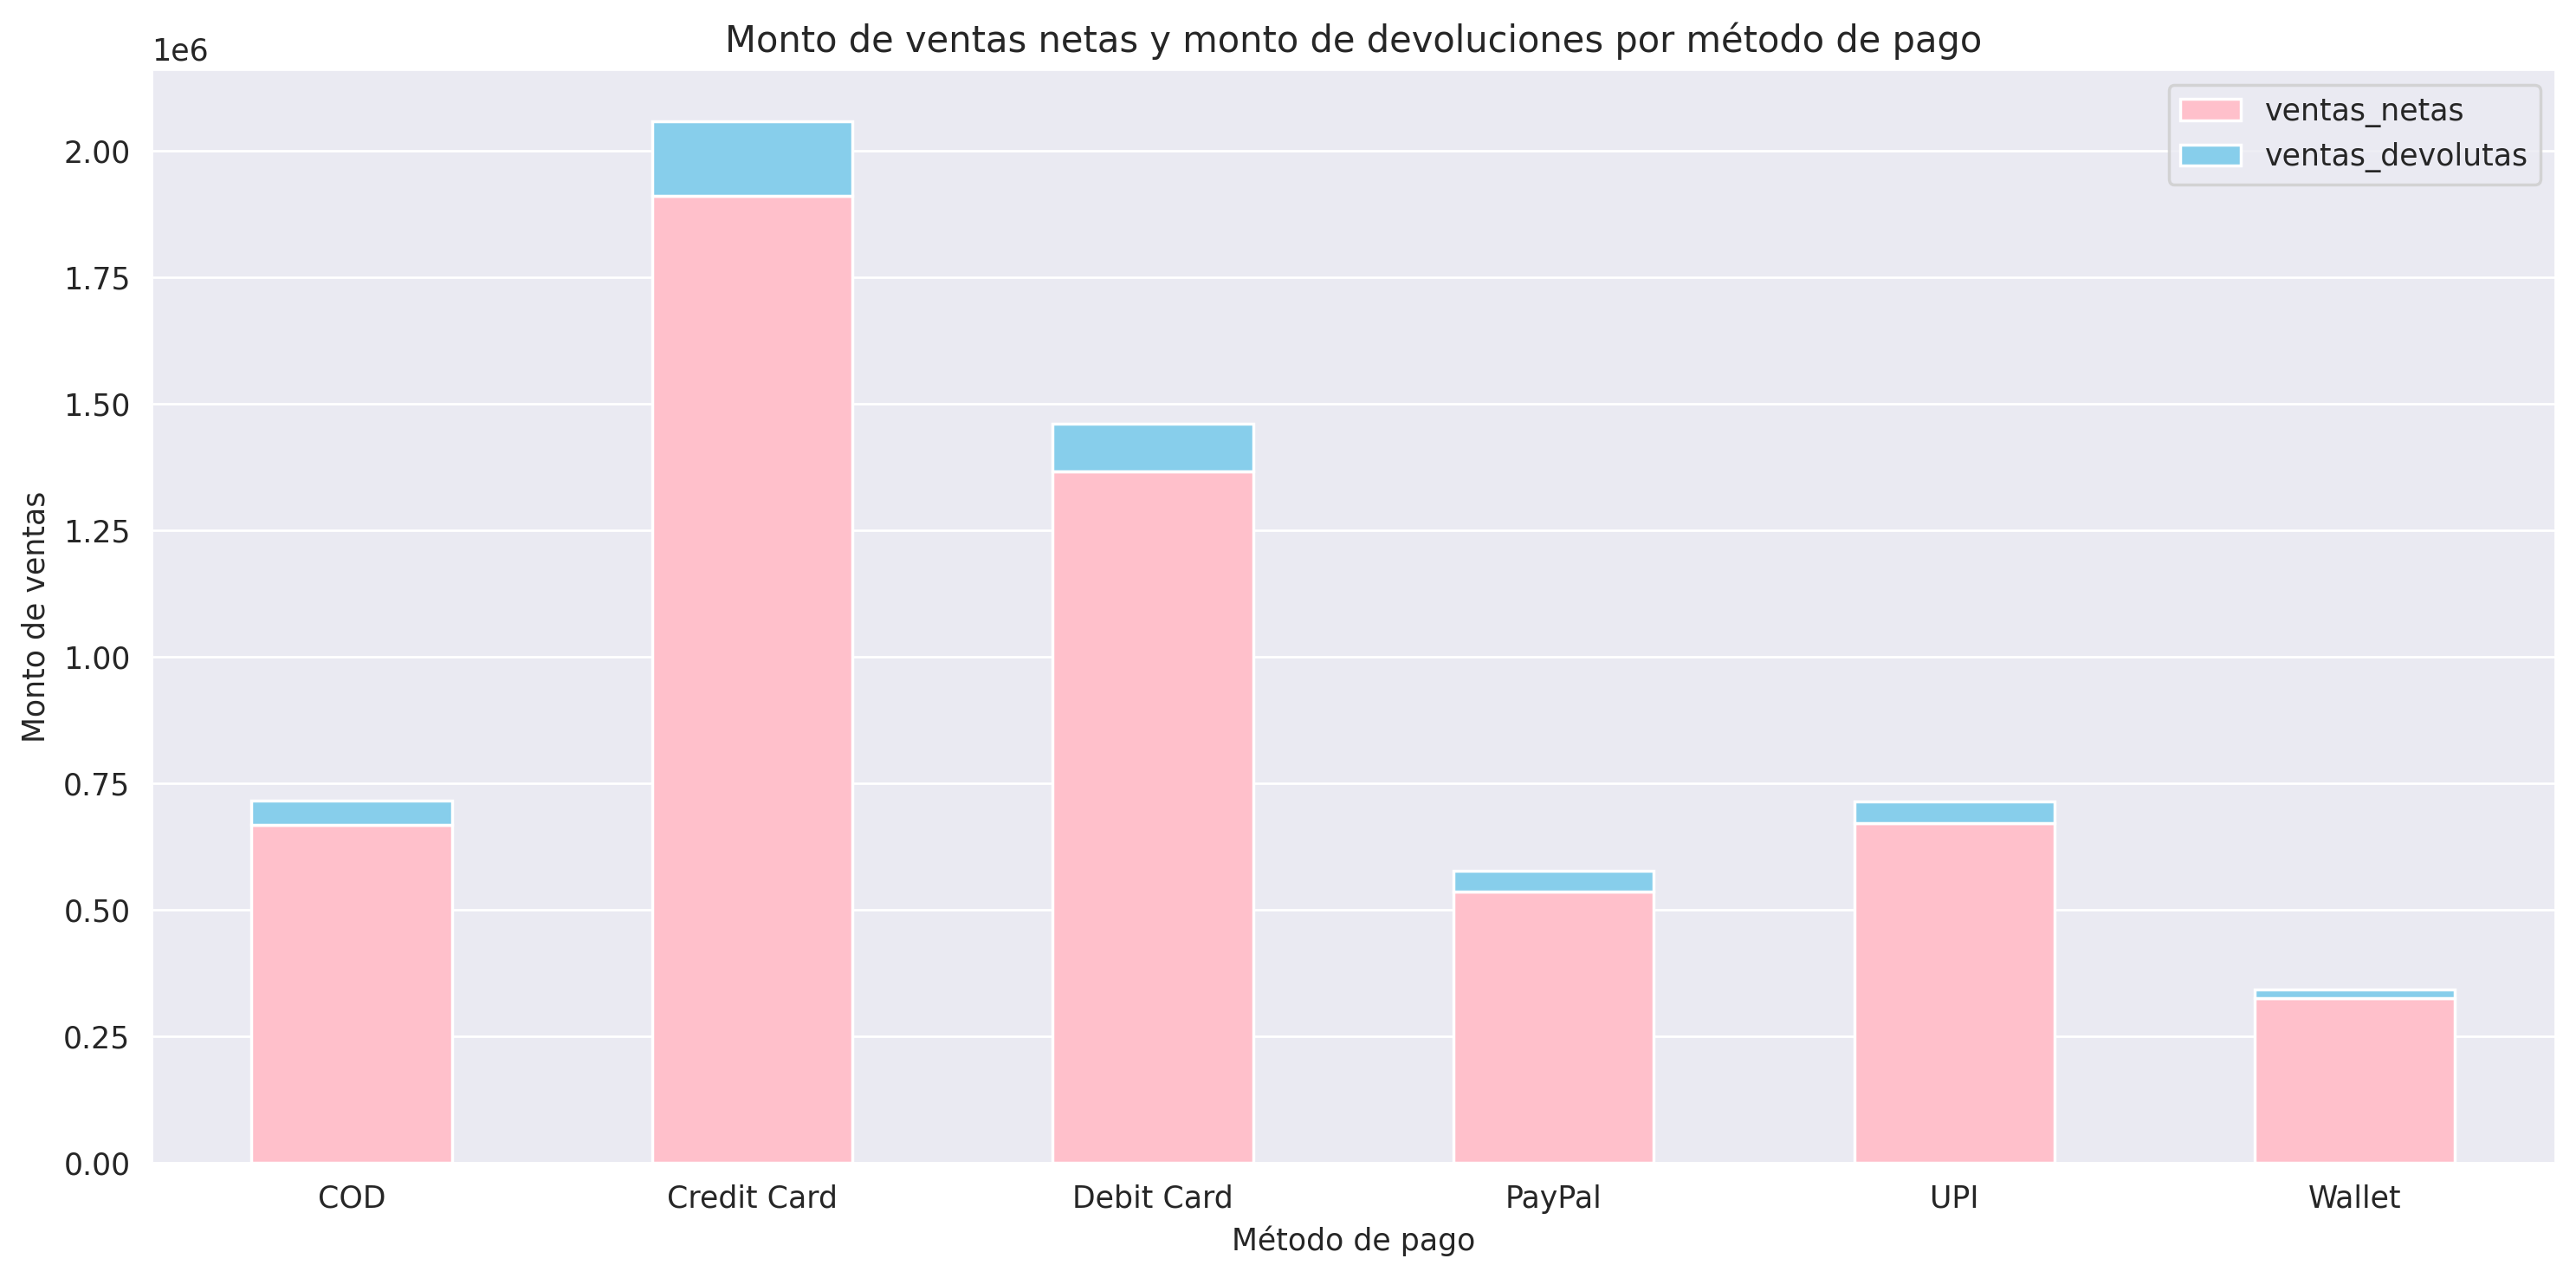

In [11]:
Resumen_metodo_pago= data.groupby('payment_method').agg(
    numero_clientes=('customer_id',lambda x:x.nunique()),
    cantidad_productos_vendidos=('quantity','sum'),
    ventas_totales=('total_amount','sum'),
    cantidad_productos_devueltos=('quantity',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    ventas_devolutas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='Yes'].sum()),
    cantidad_productos_vendidos_netos=('quantity',lambda x:x[data.loc[x.index,'returned']=='No'].sum()),
    ventas_netas=('total_amount',lambda x:x[data.loc[x.index,'returned']=='No'].sum())
)
display(Resumen_metodo_pago.to_markdown())

# Gráfico de cantidad de clientes por método de pago
plt.figure(figsize=(12,6))
sns.barplot(x=Resumen_categoría.index,y='numero_clientes',data=Resumen_categoría,palette='pastel')
plt.title('Número de clientes por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.show()

# Gráfico de cantidad de artículos vendidos y devueltos por método de pago
Resumen_metodo_pago[['cantidad_productos_vendidos','cantidad_productos_devueltos']].plot(kind='bar', stacked=True, figsize=(12,6),color=['pink','skyblue'])
plt.title('Cantidad de prodcutos vendidos y devoluciones por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de productos')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico de ventas totales y devoluciones por método de pago
Resumen_metodo_pago[['ventas_netas','ventas_devolutas']].plot(kind='bar',stacked=True, figsize=(12,6), color=['pink','skyblue'])
plt.title('Monto de ventas netas y monto de devoluciones por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Monto de ventas')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Modelo ARIMA**

In [ ]:
# Asegurar que el índice sea de tipo datetime
Ventas_totales_mes.index = pd.to_datetime(Ventas_totales_mes.index)

# Mostrar los datos preparados
print("Ventas totales por mes con índice datetime:")
print(Ventas_totales_mes.head())

Ventas totales por mes con índice datetime:
month
2023-09-01    151135.60
2023-10-01    262502.74
2023-11-01    240286.91
2023-12-01    255617.03
2024-01-01    217766.09
Name: total_amount, dtype: float64


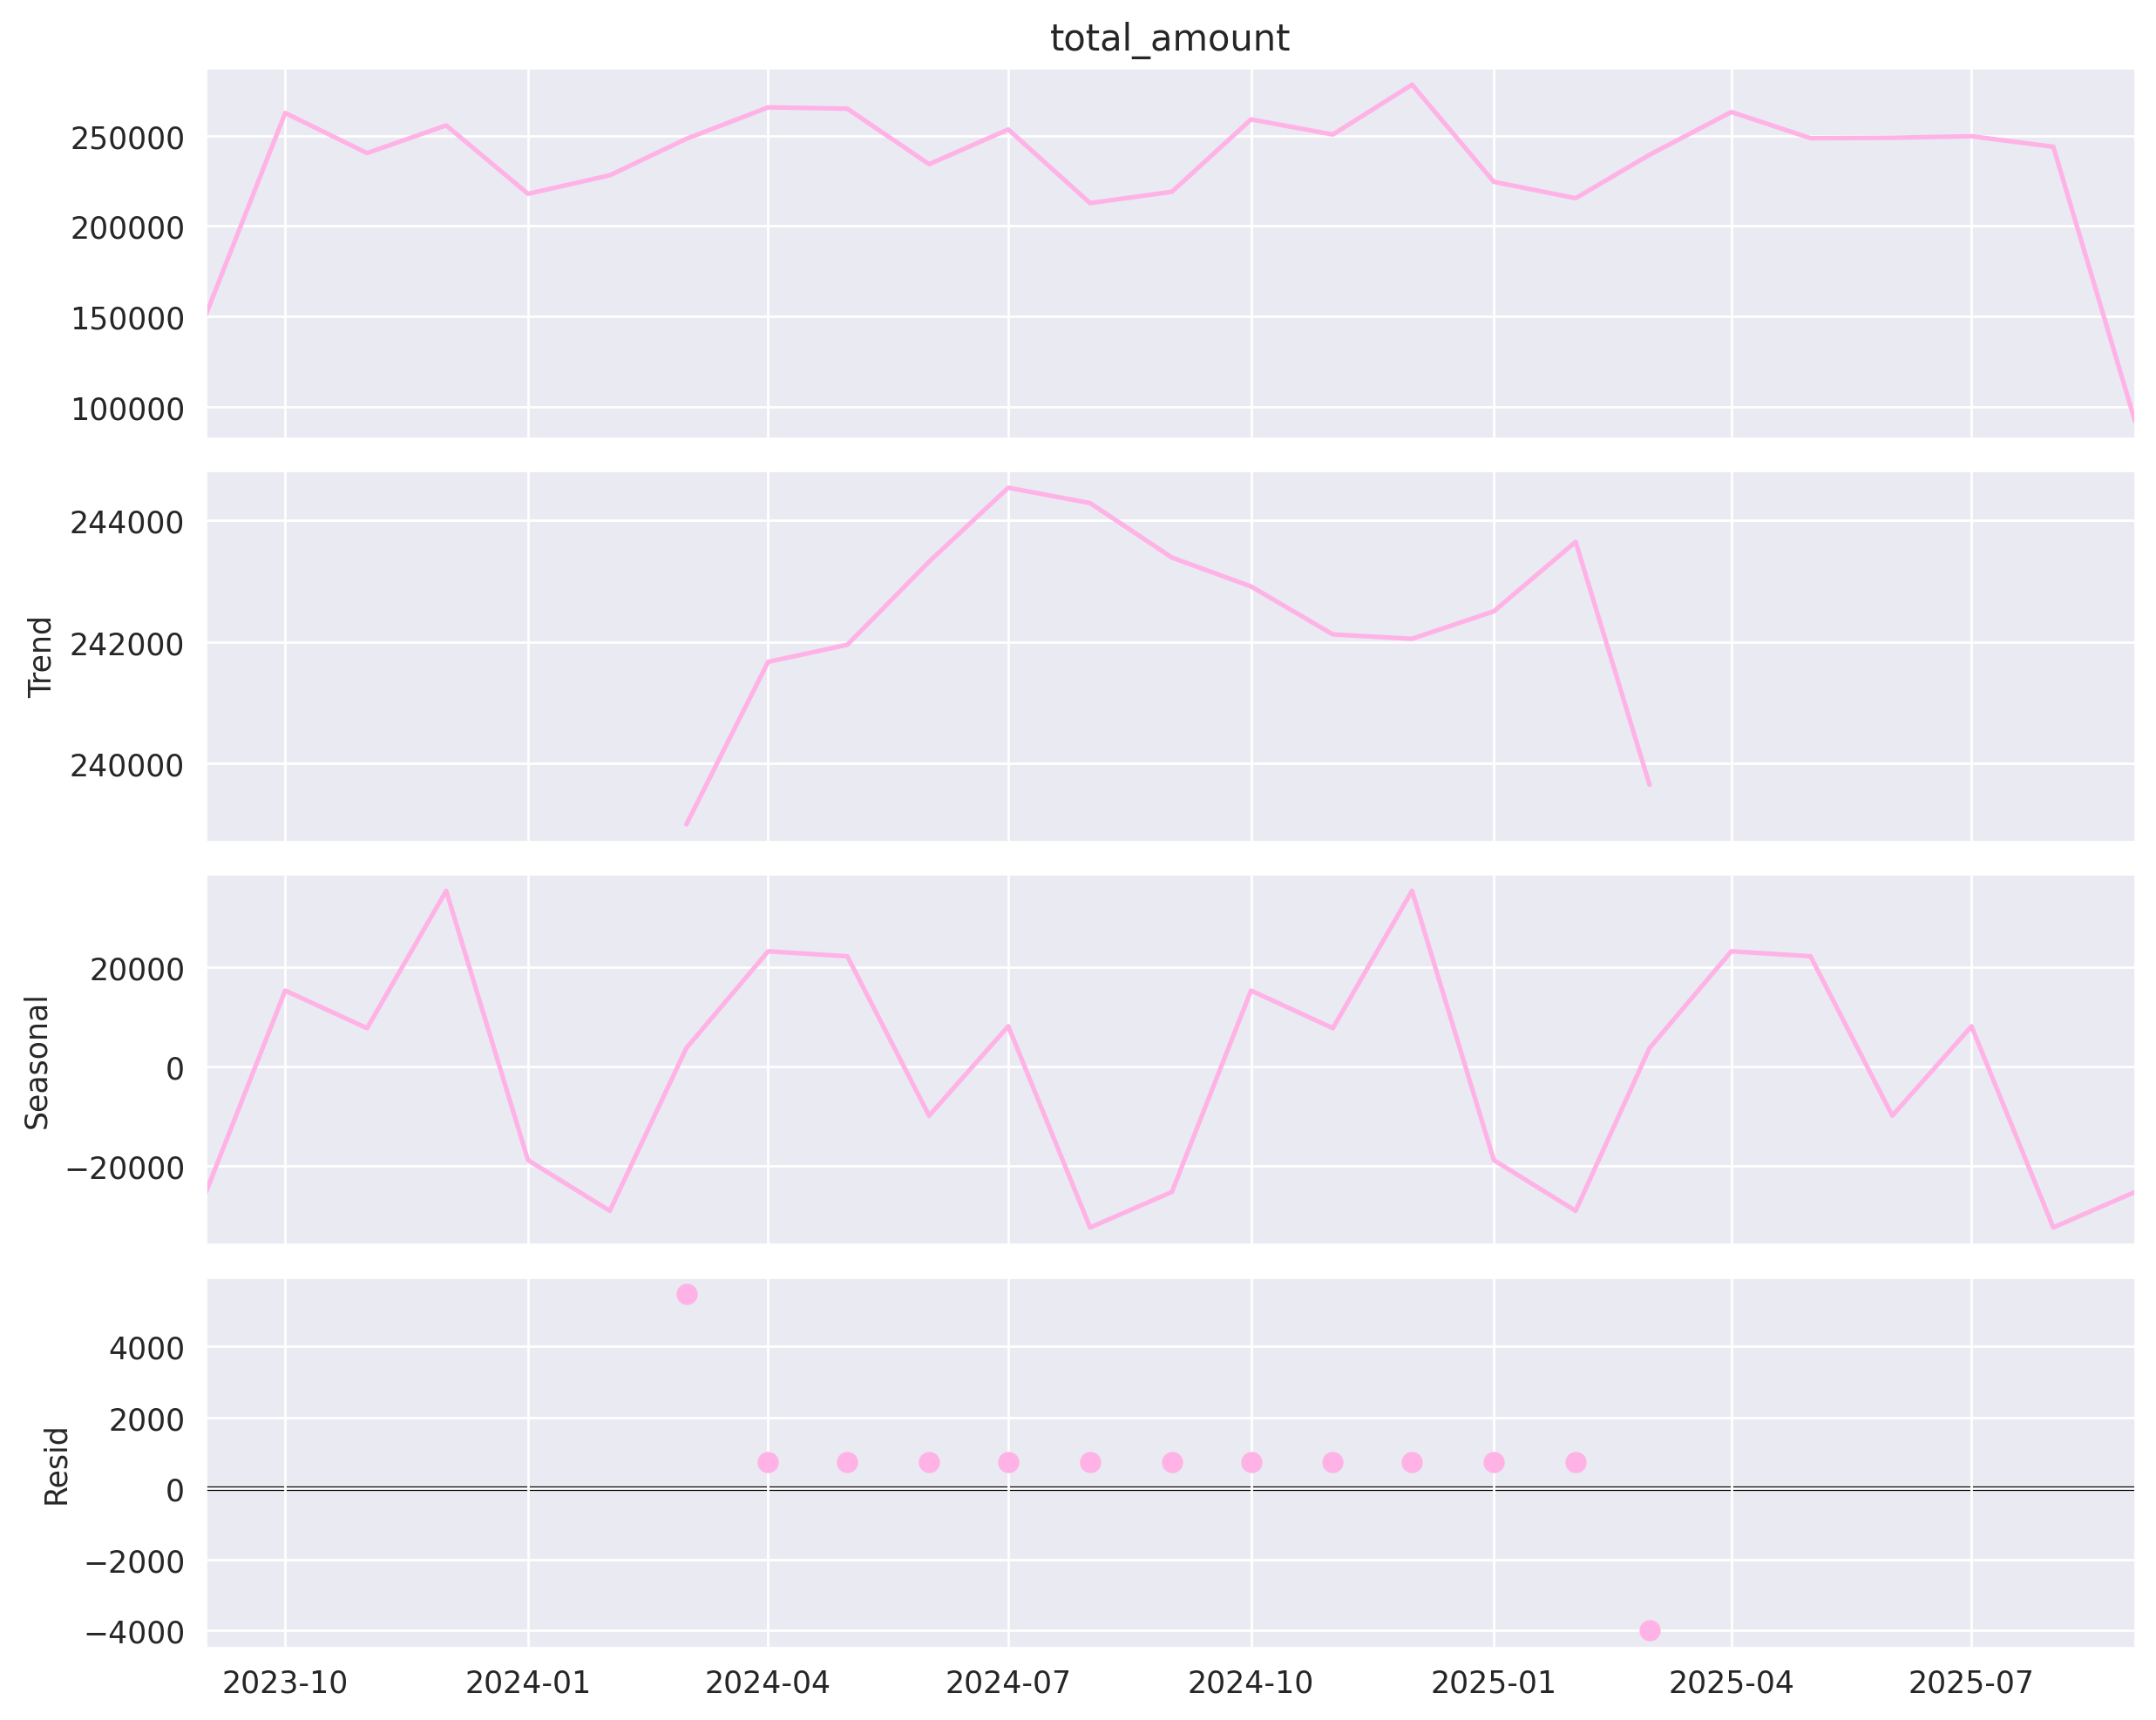

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición de la serie de tiempo
decomposition = seasonal_decompose(Ventas_totales_mes, model='additive')

# Graficar los componentes de la descomposición
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Dividir los datos en entrenamiento y prueba
# Usaremos los últimos 3 meses para prueba
train_data = Ventas_totales_mes[:-3]
test_data = Ventas_totales_mes[-3:]

# Definir el orden del modelo ARIMA (p, d, q) - No estacional
# Usaremos un orden simple para empezar
order = (1, 1, 1)
# No definir seasonal_order para un modelo ARIMA no estacional

# Crear el modelo ARIMA
model = SARIMAX(train_data, order=order) # Eliminar el argumento seasonal_order

# Entrenar el modelo
results = model.fit()

# Mostrar el resumen del modelo entrenado
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           total_amount   No. Observations:                   22
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -250.713
Date:                Sun, 05 Oct 2025   AIC                            507.427
Time:                        19:33:01   BIC                            510.560
Sample:                    09-01-2023   HQIC                           508.107
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6899      0.186     -3.706      0.000      -1.055      -0.325
ma.L1          0.9048      0.234      3.868      0.000       0.446       1.363
sigma2       5.35e+08   9.98e-11   5.36e+18      0.0


Pronósticos:
2025-07-01    261024.966588
2025-08-01    252574.732231
2025-09-01    258404.456110
Freq: MS, Name: predicted_mean, dtype: float64


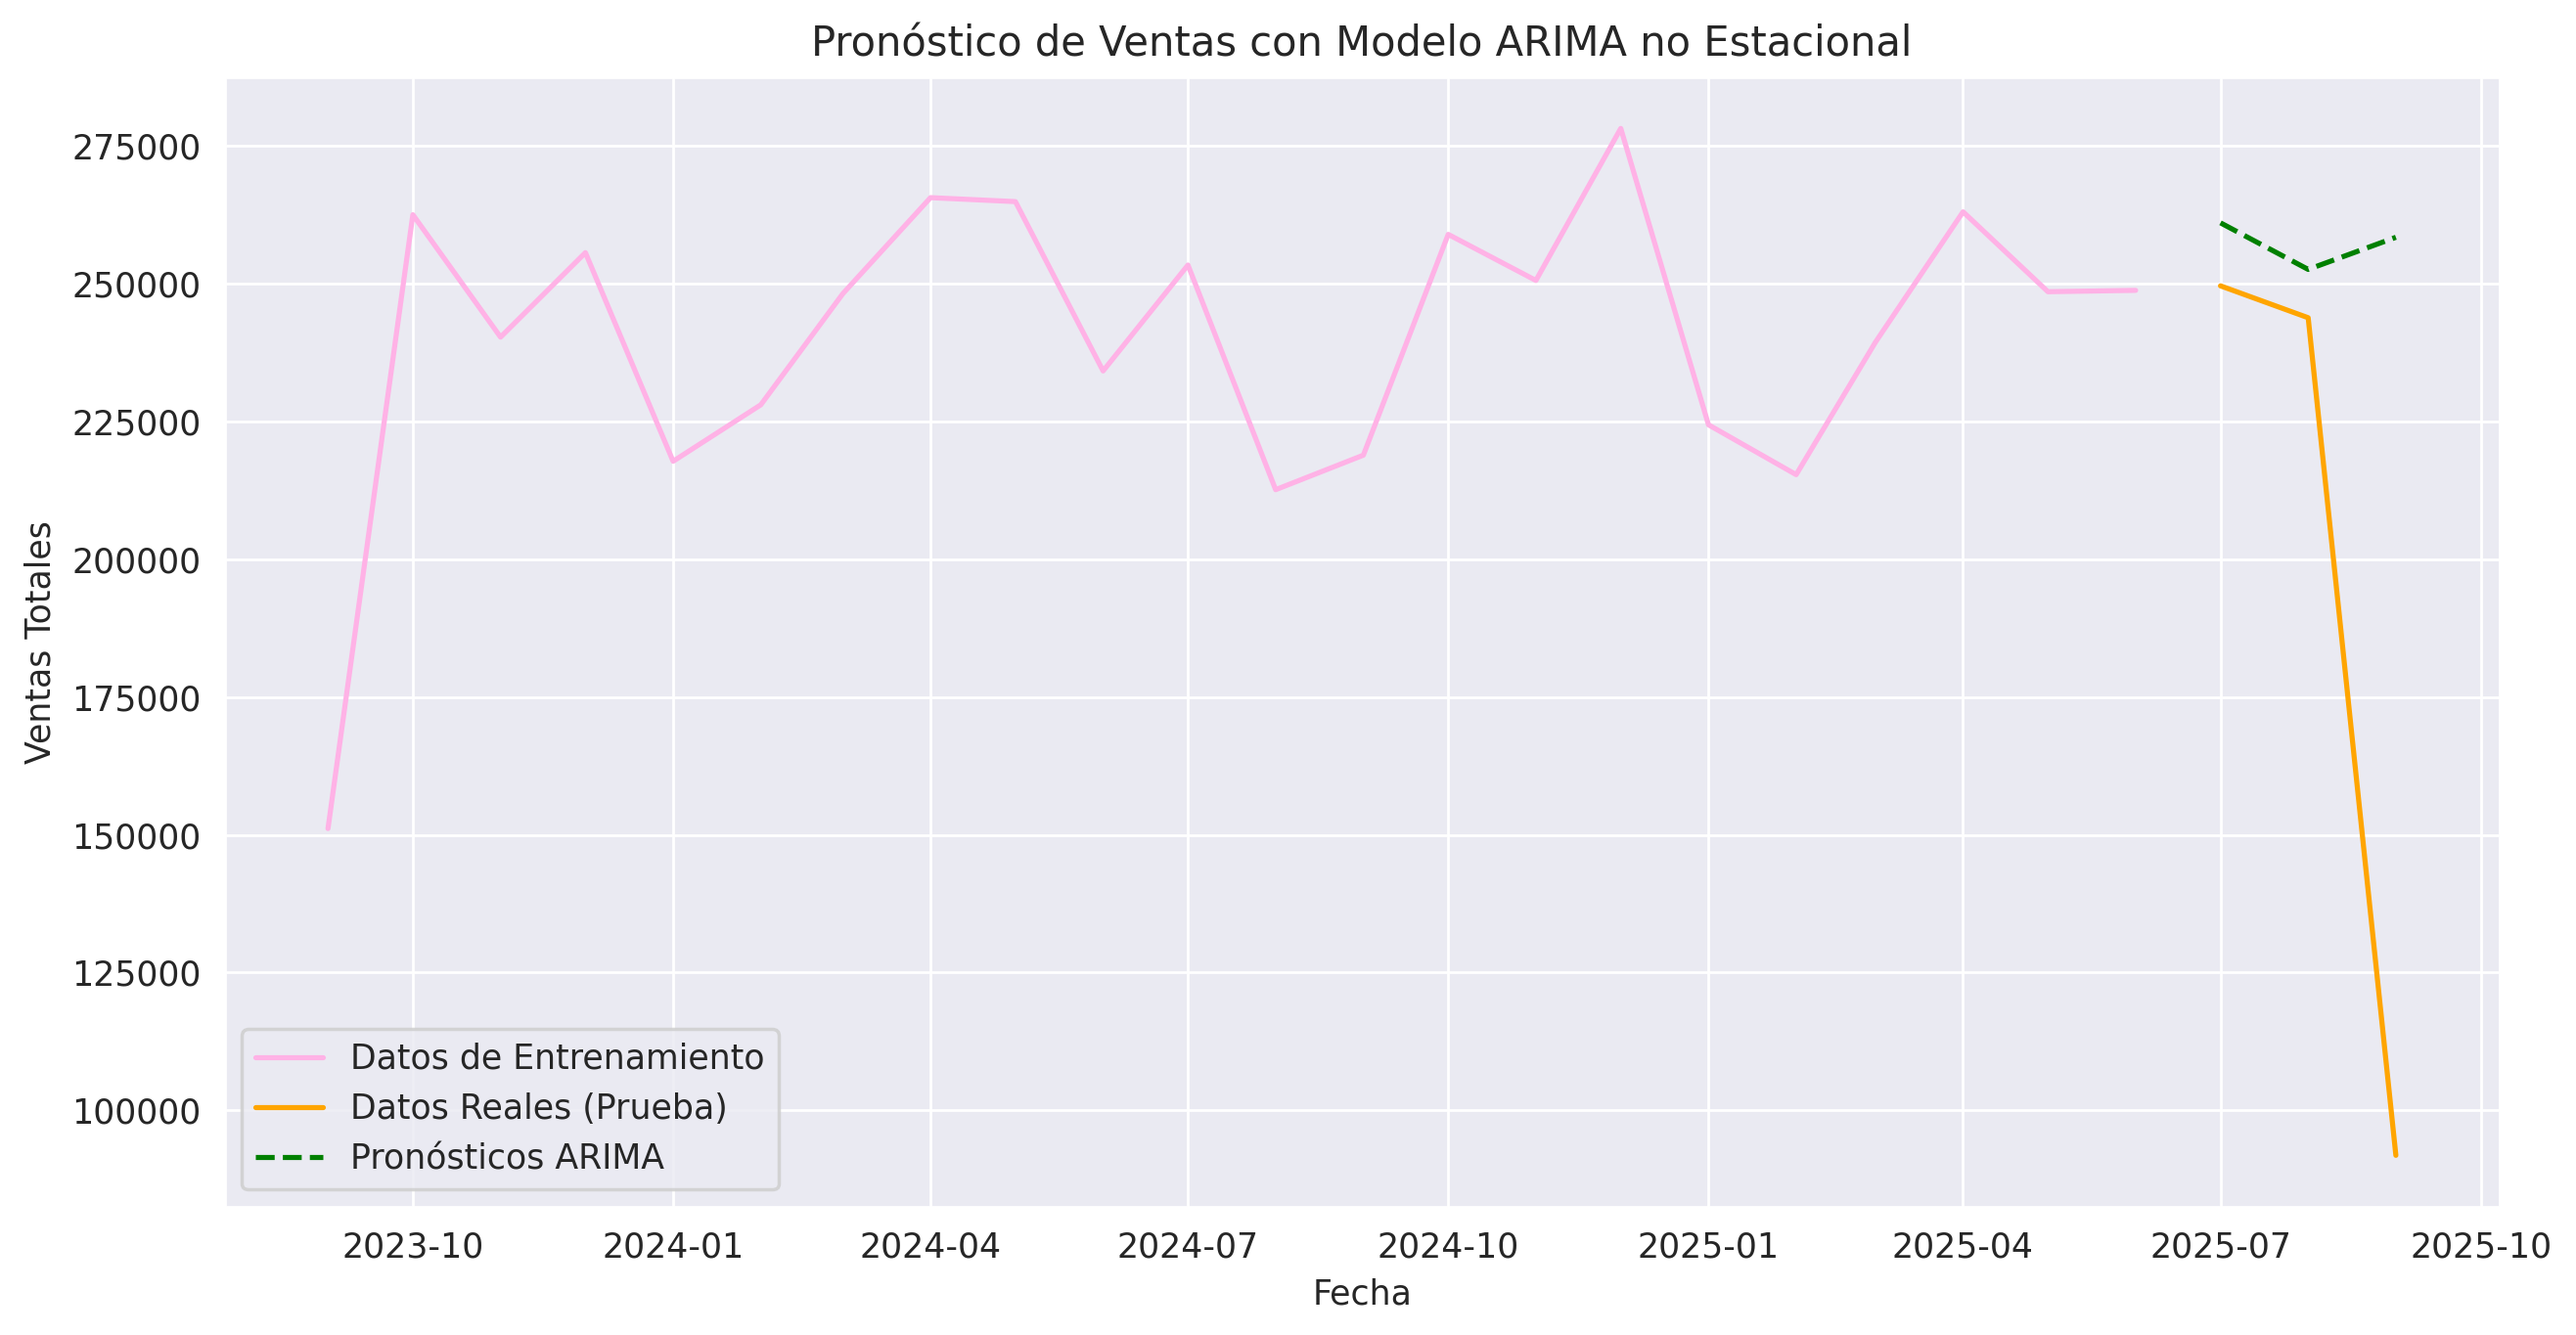

In [ ]:
# Realizar pronósticos
# El 'start' y 'end' para el pronóstico deben ser los índices del conjunto de prueba
start_index = test_data.index[0]
end_index = test_data.index[-1]

predictions = results.predict(start=start_index, end=end_index)

# Mostrar los pronósticos
print("\nPronósticos:")
print(predictions)

# Visualizar los datos históricos y los pronósticos
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Datos de Entrenamiento')
plt.plot(test_data.index, test_data, label='Datos Reales (Prueba)', color='orange')
plt.plot(predictions.index, predictions, label='Pronósticos ARIMA', color='green', linestyle='--')
plt.title('Pronóstico de Ventas con Modelo ARIMA no Estacional')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.show()